
# NETFLIX VIEWING ACTIVITY


This notebook analyses Netflix viewing activity.<br>
The information can be requested from Netflix and is recieved in CSV format. These files are uploaded here and summarised.

In [139]:
#Import relevant libraries
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import Markdown as md

%matplotlib inline

#Widen print screen
pd.options.display.width = 125

The following function searches a directory for a files containing a given string. It returns a list of all files which match. It takes two inputs:<br>
<b>dir</b>: The directory in which to search.<br>
<b>name</b>: The name of the files to search for.

In [140]:
#Specify the directory in which the CSV files reside
directory = 'C:\\Users\\rickp\\Documents\\projects\\Data\\netflix-report\\CONTENT_INTERACTION\\'

#Function to find all files in specified directory containing specified test (name)
def list_files(dir, name, ext="csv"):
    ''' Lists all files which contain specified 'name' in specified directory '''
    lst_files = []
    #Get list of files in directory which contain specified name
    lst_files = [k for k in os.listdir(dir) if name.lower() in k.lower()]
    #Only keep files with specified extension (defaulted to CSV) and return from function
    return [item for item in lst_files if item.split(".")[-1] == ext]

lst_files = list_files(directory,'viewingactivity')
lst_files

['ViewingActivity_greg.csv',
 'ViewingActivity_rick.csv',
 'ViewingActivity_steve.csv']

The following function loops through a list of file names, extracts the data, and concatenates them all into a single dataframe. It takes two inputs:<br>
<b>dir_str</b>: The directory in which to search.<br>
<b>file_list</b>: The name of the files to extract.<br>

In this case it's using the same directory as used in the function above, and the resulting list of file names it has produced.  
NOTE: The files should all have the same columns

In [141]:
#Function to extract files from a directory and concatenate into a single data frame
def concatenate_files(dir_str,file_list):
    merged = []
    columns = {}
    print("Attempting to read the following",len(file_list),"files from",dir)
    print(file_list)
    for n, file in enumerate(file_list):
        dir_file = dir_str + file
        print("\nFile ",n+1,") Attempting to read: ",file,sep="")
        try:
            read_file = pd.read_csv(dir_file, parse_dates = ['Start Time'])
            print("Number of rows and columns read in:",read_file.shape)
            columns[n] = sorted(list(read_file.columns))
        except:
            print("Error with read. File skipped") 
        #Only concatenate if columns are the same as the initial file read in
        if columns[0] == columns[n]:
            merged.append(read_file)
            concatenated_data = pd.concat(merged)
            print("File successfully concatenated to main dataframe")
        else:
            print("*** WARNING:",file,"does not have the same columns as the first file so can't concatenate ***")
    print("\nLoop complete. Total number of rows in final dataframe:",f'{concatenated_data.shape[0]:,}')
    concatenated_data.sort_values(by=['Start Time'], ascending=False, inplace=True)
    concatenated_data = concatenated_data.reset_index(drop=True)
    return concatenated_data
    
#Run function. lst_files is the output from the list_files function
df_netflix = concatenate_files(directory,lst_files)


Attempting to read the following 3 files from <built-in function dir>
['ViewingActivity_greg.csv', 'ViewingActivity_rick.csv', 'ViewingActivity_steve.csv']

File 1) Attempting to read: ViewingActivity_greg.csv
Number of rows and columns read in: (12009, 10)
File successfully concatenated to main dataframe

File 2) Attempting to read: ViewingActivity_rick.csv
Number of rows and columns read in: (10118, 10)
File successfully concatenated to main dataframe

File 3) Attempting to read: ViewingActivity_steve.csv
Number of rows and columns read in: (1724, 10)
File successfully concatenated to main dataframe

Loop complete. Total number of rows in final dataframe: 23,851


# DATA UNDERSTANDING

Now the CSV files have been successfully imported and concatenated into a single dataframe called 'df_netflix', lets take a look at what it contains.

In [142]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23851 entries, 0 to 23850
Data columns (total 10 columns):
Profile Name               23851 non-null object
Start Time                 23851 non-null datetime64[ns]
Duration                   23851 non-null object
Attributes                 12978 non-null object
Title                      23851 non-null object
Supplemental Video Type    4365 non-null object
Device Type                23851 non-null object
Bookmark                   23851 non-null object
Latest Bookmark            23851 non-null object
Country                    23851 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 1.8+ MB


<u>FIELD DEFINITIONS</u>

  <b>Profile Name</b>: the name of the profile in which viewing occurred<br>
  <b>Duration</b>: the length of the viewing session<br>
  <b>Title</b>: the TV show or movie viewed<br>
  <b>Supplemental Video Type</b>: videos other than a TV show or a movie (such as trailers)<br>
  <b>Attributes</b>: was the title autoplayed<br>
  <b>Device Type</b>: on which device was the title viewed on<br>

'Bookmark', 'Latest Bookmark', and 'Attributes' are not required for analysis so we'll delete them and then take a look at the top 5 rows of the data.

In [143]:
#Remove fields which are not useful
df_netflix = df_netflix.drop(['Bookmark', 'Latest Bookmark', 'Attributes'], axis=1)
df_netflix.head()

Profile Name          Start Time  Duration                                              Title Supplemental Video Type  \
0          R&G 2021-03-14 14:18:32  00:00:18  Chef's Table: BBQ: Volume 1: Lennox Hastie (Ep...                     NaN   
1          R&G 2021-03-14 13:54:28  00:23:59  Chef's Table: BBQ: Volume 1: Tootsie Tomanetz ...                     NaN   
2          R&G 2021-03-14 13:30:45  00:22:19                MasterChef UK: Season 11: Episode 1                     NaN   
3          R&G 2021-03-14 13:30:08  00:00:21                MasterChef UK: Season 12: Episode 1                     NaN   
4          R&G 2021-03-14 13:29:56  00:00:10       Celebrity MasterChef: Season 11_hook_02_16x9                    HOOK   

                                 Device Type              Country  
0  LG 2017 RTK K3Lp Standard UHD TV Smart TV  GB (United Kingdom)  
1  LG 2017 RTK K3Lp Standard UHD TV Smart TV  GB (United Kingdom)  
2  LG 2017 RTK K3Lp Standard UHD TV Smart TV  GB (United Kingdom)  
3  LG 2017 RTK K3Lp Standard UHD TV Smart TV  GB (United Kingdom)  
4  LG 2017 RTK K3Lp Standard UHD TV Smart TV  GB (United Kingdom)

# CLEAN DATA

First lets look at 'Supplemental Video Type'. This displays if the video was a trailer or preview etc. The majority of entries are missing (NaN) so we can assume that these represent a film or series. 

In [144]:
print(df_netflix['Supplemental Video Type'].value_counts(dropna = False))

NaN               19486
TRAILER            2159
HOOK               1976
TEASER_TRAILER       84
PREVIEW              50
RECAP                43
PROMOTIONAL          27
BIG_ROW              12
BUMPER                5
BONUS_VIDEO           3
TUTORIAL              2
MUSIC_VIDEO           2
TAKE_OVER             1
CHARACTER             1
Name: Supplemental Video Type, dtype: int64


We're only going to keep viewings which are 5 minutes or longer so this should remove most of these populated entries.

First of all we need to create a new numeric field called 'Duration in Minutes' because 'Duration' is a string showing Hours:Minutes:Seconds.  All viewings less than 5 minutes will be dropped then we'll check 'Supplemental Video Type' again to make sure it only contains missing values.

In [145]:
#Split duration into HH:MM and create duration in minutes (HH * 60 + MM)
df_netflix['Duration in Minutes'] = df_netflix['Duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

#Drop rows with duration less than 5 minutes
df_netflix = df_netflix[df_netflix['Duration in Minutes']>5]

#Make sure it has worked
print("Double check to ensure only NaN have been kept:\n",df_netflix['Supplemental Video Type'].value_counts(dropna = False),sep="")

#And then delete the field entirely as no longer required.
df_netflix.drop(['Supplemental Video Type'], axis =1, inplace= True)

Double check to ensure only NaN have been kept:
NaN    14399
Name: Supplemental Video Type, dtype: int64


Excellent! Only missing values have been successfully kept. We can analyse viewing trends knowing we're only looking at genuine films or TV programs which have been viewed for 5 minutes or longer.

Now lets look at who has been using Netflix after cleaning up the column 'Profile Name' slighty. Some profiles are going to be:
 - dropped
 - renamed
 - reallocated for certain title viewings (some profiles are for >1 person but occationally they are used by just 1 person)

In [146]:
#Firstly,remove leading and trailing blanks from profile name
df_netflix['Profile Name'] = df_netflix['Profile Name'].str.strip()

#Drop some profiles
drop_profiles = ["D&D","M&T","Kids"]
columns_before_drop = df_netflix.shape[0]
df_netflix = df_netflix[~df_netflix['Profile Name'].isin(drop_profiles)].reset_index(drop=True)

#Clean & rename some profiles
df_netflix['Profile Name'] = df_netflix['Profile Name'].apply(lambda x: "Rosie and Greg" if x == "R&G" else x)
df_netflix['Profile Name'] = df_netflix['Profile Name'].apply(lambda x: "Brian" if x == "Dad" else x)
df_netflix['Profile Name'] = df_netflix['Profile Name'].apply(lambda x: "Jenny" if x == "Mom" else x)

#Re-assign some profiles depending on viewing
conditions = [
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("The Haunting")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("Ginny & Georgia")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("Jane The Virgin")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("Gilmore")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("Mamma Mia! Here We Go Again")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("Gossip Girl")),
    (df_netflix['Profile Name'] == "Maria and Rick") & (df_netflix['Title'].str.contains("You:"))
]

choices = [
    "Rick",
    "Maria",
    "Maria",
    "Maria",
    "Maria",
    "Maria",
    "Maria"
]
#Apply profile re-assign
df_netflix['Profile Name'] = np.select(conditions, choices, default=df_netflix['Profile Name'])

#Display frequency and % by profile name 
print("\n(NOTE: The profiles",
      drop_profiles,
      "have been deleted which has removed", columns_before_drop - df_netflix.shape[0], "rows)\n")

c = df_netflix['Profile Name'].value_counts(dropna=False)
p = df_netflix['Profile Name'].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
print(pd.concat([c,p], axis=1, keys=["Titles Watched", '%']))

most_viewings = c.take([0]).to_frame().reset_index() 
most_viewings_p = p.take([0]).to_frame().reset_index()

md("<br>{} has watched the most titles with {}.<br> This is {} of the total population.".format(most_viewings['index'][0], most_viewings['Profile Name'][0], most_viewings_p['Profile Name'][0]))



(NOTE: The profiles ['D&D', 'M&T', 'Kids'] have been deleted which has removed 331 rows)

                Titles Watched      %
Greg                      3660  26.0%
Dylan                     3168  22.5%
Rosie                     2875  20.4%
Maria and Rick            1878  13.3%
Elliot                     670   4.8%
Rosie and Greg             647   4.6%
Maria                      441   3.1%
Brian                      287   2.0%
Stella                     162   1.2%
Jenny                      151   1.1%
Irene                       63   0.4%
Steven                      47   0.3%
Rick                        19   0.1%


<br>Greg has watched the most titles with 3660.<br> This is 26.0% of the total population.

Now we're going to clean up the 'Country' field by removing the country code and also reallocating to the correct country when we know a VPN has been used.

In [147]:
country_before = list(df_netflix.Country.unique())
print("List of Countries in the data BEFORE cleansing:")
pprint(country_before)

#Clean Country field to remove code and brackets
df_netflix['Country'] = df_netflix['Country'].str.split("(",expand=True)[1].str.strip().str[0:-1].str.strip()

#Clean known VPN usage using np.arrays rather than apply function (it is quicker)
conditions = [
    (df_netflix['Profile Name'] == 'Dylan') & (df_netflix['Country'] == "United States"),
    (df_netflix['Profile Name'] == 'Greg') & (df_netflix['Country'] == "Canada")]

choices = [
    "United Kingdom",
    "United Kingdom"]

#Assign VPN clean up to data
df_netflix['Country'] = np.select(conditions, choices, default=df_netflix['Country'])

country_after = list(df_netflix.Country.unique())
print("\nList of Countries in the data AFTER cleansing (including reassigning VPN usage so some countries will disappear):")
pprint(country_after)

List of Countries in the data BEFORE cleansing:
['GB (United Kingdom)',
 'ES (Spain)',
 'CY (Cyprus)',
 'US (United States)',
 'AU (Australia)',
 'GR (Greece)',
 'CA (Canada)',
 'PL (Poland)',
 'PT (Portugal)']

List of Countries in the data AFTER cleansing (including reassigning VPN usage so some countries will disappear):
['United Kingdom',
 'Spain',
 'Cyprus',
 'United States',
 'Australia',
 'Greece',
 'Poland',
 'Portugal']


OK. That looks much better.  

Finally for the data cleansing we're going to reassign 'Device Type' to more meaningful groups.  There are a whole range of different types of devices used but we're going to group these into Computer, TV, Phone, Tablet, & Other.

In [148]:
#Group into TV, Phone, Tablet, Games Console, Laptop, Other
#MAKE SURE REGEX IS WORKING CORRECTLY! Find out what exact match is rather than 'contains'
conditions = [
    df_netflix['Device Type'].str.contains('TV|Stick|BD Recorder|Sky|Xbox|Playstation|Theater', case=False, regex=True),
    df_netflix['Device Type'].str.contains('Phone|Mobile', case=False, regex=True),
    df_netflix['Device Type'].str.contains('Tablet|ipad', case=False, regex=True),
    df_netflix['Device Type'].str.contains('PC|OS|Edge|Mac|Chrome|Windows', case=False, regex=True)]

choices = [
    "TV",
    "Phone",
    "Tablet",
    "Computer"]
#Apply new device groups
df_netflix['Device Type Group'] = np.select(conditions, choices, default="Other")

#Check they are assigned properly:
pd.crosstab(df_netflix['Device Type'], df_netflix['Device Type Group'], margins=True, margins_name="Total")

Device Type Group                                   Computer  Phone     TV  Tablet  Total
Device Type                                                                              
2016 RTK K2L UHD TV Smart TV                               0      0   3844       0   3844
Amazon Fire TV Stick 2020 + Streaming Stick                0      0    126       0    126
Amazon Fire TV Stick 2020 Lite Streaming Stick             0      0      5       0      5
Android DefaultWidevineL3Phone Android Phone               0    746      0       0    746
Android DefaultWidevineL3Phone Android Phone (O...         0     57      0       0     57
Android DefaultWidevineL3Phone Android Phone (s...         0      5      0       0      5
Android DefaultWidevineL3Tablet Android Tablet             0      0      0      82     82
Apple iPad 2 WiFi                                          0      0      0     132    132
Apple iPad 6th Gen 9.7 (Wi-Fi) iPad                        0      0      0     206    206
Apple iPhone 6                                             0     14      0       0     14
Apple iPhone 7 (GSM)                                       0     35      0       0     35
Chrome OS (Cadmium)                                       11      0      0       0     11
Chrome PC (Cadmium)                                      122      0      0       0    122
DefaultWidevineAndroidPhone                                0    340      0       0    340
DefaultWidevineAndroidPhone (samsung_SM-G950F)             0    107      0       0    107
DefaultWidevineAndroidTablets                              0      0      0       2      2
DefaultWidevineAndroidTablets (Amazon_KFGIWI)              0      0      0     112    112
DefaultWidevineAndroidTablets (samsung_SM-T700)            0      0      0      40     40
Edge (Cadmium)                                             1      0      0       0      1
FireTV Stick 2014                                          0      0   1380       0   1380
FireTV Stick 2016                                          0      0    132       0    132
Google Chromecast V3 Streaming Stick                       0      0    124       0    124
Google Chromecast streaming stick                          0      0    214       0    214
LG 2017 RTK K3Lp Standard UHD TV Smart TV                  0      0   3049       0   3049
Mac                                                       13      0      0       0     13
Microsoft Xbox 360                                         0      0    247       0    247
Microsoft Xbox One                                         0      0   1228       0   1228
Mobile                                                     0    102      0       0    102
Netflix Chrome MAC (Cadmium) HTML 5                      347      0      0       0    347
PC                                                         7      0      0       0      7
Panasonic 2012 BD Recorder DMR-BWT720                      0      0     50       0     50
Panasonic DTV 2014 sLD8A Smart TV                          0      0     40       0     40
Samsung 2012 Mstar X10 Smart TV                            0      0     26       0     26
Samsung 2013 Fox-P Smart TV                                0      0    125       0    125
Samsung 2014 BD/HTS - MTK 8560 Home Theater Sys...         0      0     19       0     19
Samsung 2015 Hawk-M UHD TV                                 0      0     43       0     43
Sky UK skyfalconv2 MVPD STB                                0      0      9       0      9
Sky UK skymr MVPD STB                                      0      0     22       0     22
Sony CE Sony CE 2014 Core DTV Smart TV                     0      0      9       0      9
Sony Sony Android TV 2018 M2 4K Smart TV                   0      0     20       0     20
TCL 2K17 FHD TV NT63 Smart TV                              0      0    431       0    431
Vestel MB130 2018 Dolby Vision Smart TV                    0      0     47       0     47
Windows 8 x64 devices                   

OK!  Everything looks like it has been assigned to a reasonable group and nothing has fallen into the 'OTHER' category. <br><br>
We also want to reassign Phone to TV if they have watched for over 60 minutes. This is purely an assumption that the phone was probably used to cast to a tv rather than the phone screen being used.

In [149]:
#Reassign Phone to TV if used for more than an hour
print("BEFORE phone being reassigned to TV:")
before_TV_PHONE = df_netflix.loc[df_netflix['Device Type Group'].isin(['Phone', 'TV'])]
print(before_TV_PHONE['Device Type Group'].value_counts())

def update_phone_tv(row):
    if row['Device Type Group'] == "Phone" and row['Duration in Minutes']>60:
        return "TV"
    else:
        return row['Device Type Group']

df_netflix['Device Type Group'] = df_netflix.apply(update_phone_tv, axis = 'columns')

print("\nAFTER phone being reassigned to TV:")
after_TV_PHONE = df_netflix.loc[df_netflix['Device Type Group'].isin(['Phone', 'TV'])]
print(after_TV_PHONE['Device Type Group'].value_counts())


BEFORE phone being reassigned to TV:
TV       11190
Phone     1406
Name: Device Type Group, dtype: int64

AFTER phone being reassigned to TV:
TV       11210
Phone     1386
Name: Device Type Group, dtype: int64


As can be seen above, a small number of phone viewings have been reassigned to TV.

The final part of data cleansing is to remove duplicates. For some reason the data is showing there is more than one entry for the same profile watching the same title at the same time! This only happens a small number of times.

In [150]:
#Sort data
df_netflix = df_netflix.sort_values(by = ['Profile Name', 'Start Time', 'Duration'], ascending = False)

#Remove the row if the previous row has the same profile and start date (i.e. start time)
before_dups = df_netflix.shape[0]
print("Number of rows before removing duplicates:",f'{before_dups:,}')
df_netflix = df_netflix.drop(df_netflix[(df_netflix['Profile Name'].shift(1) == df_netflix['Profile Name']) 
                 & (df_netflix['Start Time'].shift(1) == df_netflix['Start Time'])].index).reset_index(drop= True)
print("Number of rows after removing duplicates:",f'{df_netflix.shape[0]:,}')
print("Duplicates removed:",f'{before_dups - df_netflix.shape[0]:,}')

Number of rows before removing duplicates: 14,068
Number of rows after removing duplicates: 14,061
Duplicates removed: 7


The data has now been well and truely cleansed!  Lets start analysing!

# ANALYSIS

Lets start with some basic counts.

What devices have been used?

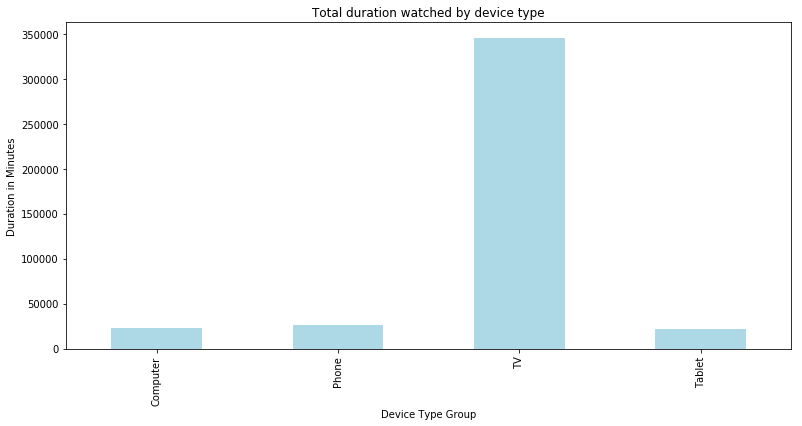

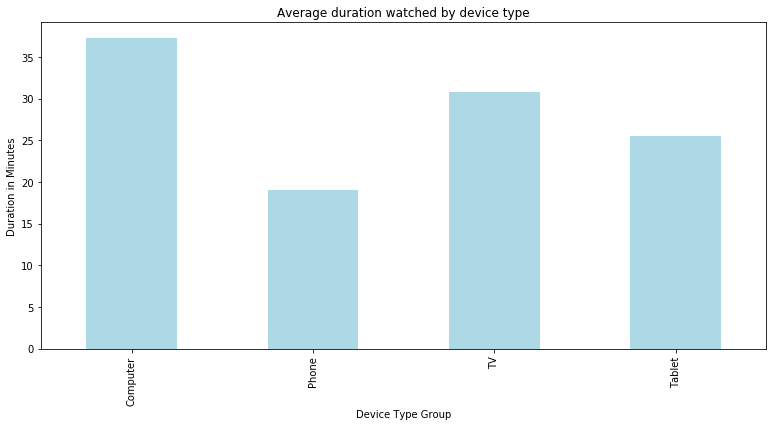

In [151]:
#Summarise viewings by device type
df_device_info = df_netflix.groupby('Device Type Group')['Duration in Minutes'].agg(['count', 'sum', 'mean'])

#Bar chart of viewings by duration
df_device_info.iloc[:,1].plot(kind='bar',
                              figsize=(13,6),
                              color='lightblue',
                              title="Total duration watched by device type")
plt.ylabel('Duration in Minutes')
plt.show()

#Bar chart of viewings by average duration
df_device_info.iloc[:,2].plot(kind='bar',
                       figsize=(13,6),
                       color='lightblue',
                       title="Average duration watched by device type")
plt.ylabel('Duration in Minutes')
plt.show()

TV has been used the most by far but surprisingly the longest average time for each individual title being viewed is on the computer.

Now lets see who's using Netflix the most.

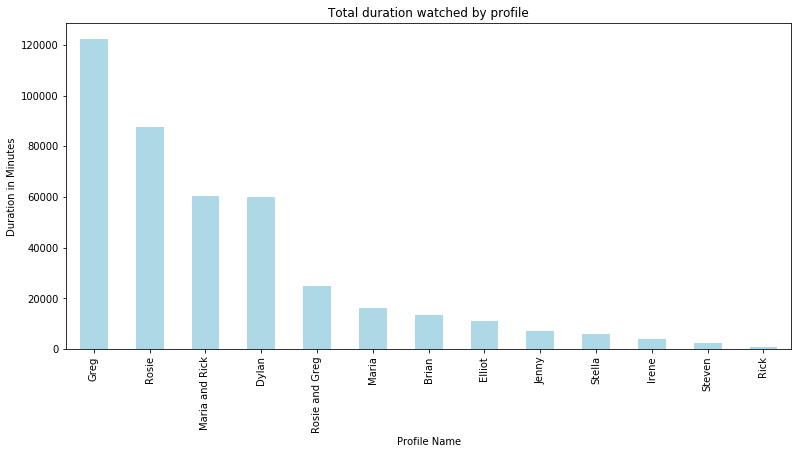

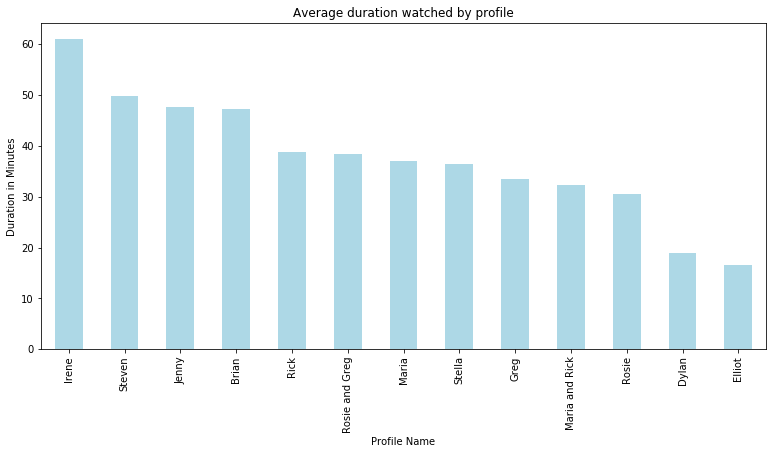

In [152]:
#Summarise viewings by device type
df_profile_info = df_netflix.groupby('Profile Name')['Duration in Minutes'].agg(['count', 'sum', 'mean'])

#Bar chart of viewings by duration
df_profile_info = df_profile_info.sort_values('sum', ascending = False)
df_profile_info.iloc[:,1].plot(kind='bar',
                              figsize=(13,6),
                              color='lightblue',
                              title="Total duration watched by profile")
plt.ylabel('Duration in Minutes')
plt.show()

#Bar chart of viewings by duration
df_profile_info = df_profile_info.sort_values('mean', ascending = False)
df_profile_info.iloc[:,2].plot(kind='bar',
                              figsize=(13,6),
                              color='lightblue',
                              title="Average duration watched by profile")
plt.ylabel('Duration in Minutes')
plt.show()

Looks like Greg watches a lot of short shows!

Now lets check out which country people are viewing in:

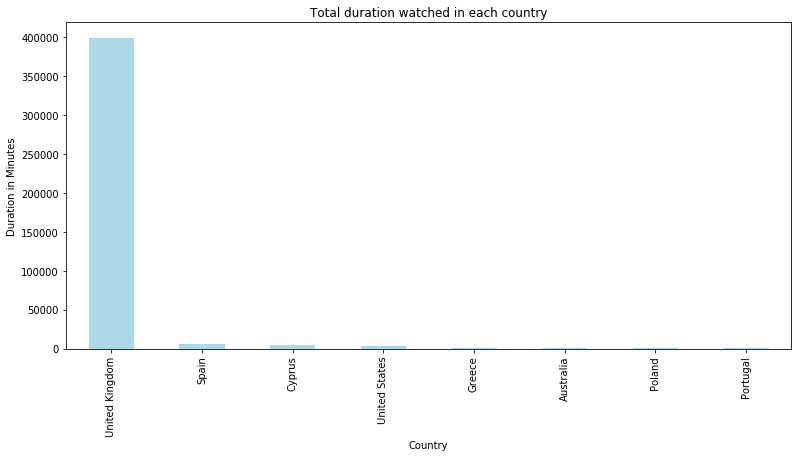

In [153]:
#Summarise viewings by device type
df_country_info = df_netflix.groupby('Country')['Duration in Minutes'].agg(['count', 'sum', 'mean'])

#Bar chart of viewings by duration
df_country_info = df_country_info.sort_values('sum', ascending = False)
df_country_info.iloc[:,1].plot(kind='bar',
                              figsize=(13,6),
                              color='lightblue',
                              title="Total duration watched in each country")
plt.ylabel('Duration in Minutes')
plt.show()


Unsurprisingly, most of the viewings in our population are in the UK.  There are some countries in which people have watched something.  Lets find out who they are.

In [154]:
#Show cross tab of profile name by country to see where people have been watching Netflix
print("\nCount of individual viewings per Country by profile")
pd.crosstab(df_netflix['Country'], df_netflix['Profile Name'], margins=True, margins_name="Total")


Count of individual viewings per Country by profile


Profile Name    Brian  Dylan  Elliot  Greg  Irene  Jenny  Maria  Maria and Rick  Rick  Rosie  Rosie and Greg  Stella  \
Country                                                                                                                
Australia           0      0       0    12      0      0      0               0     0      6               8       0   
Cyprus              0    148       7     0      0      0      6              53     0      0               0       0   
Greece              0     21       0     0      0      0      0              19     0      0               0       0   
Poland              0      0       0     8      0      0      0               0     0      0               0       0   
Portugal            0      0       0     0      0      0      0               0     0      3               0       0   
Spain             136      0       0     0      0      0      0               0     0      0               0       0   
United Kingdom    151   2998     605  3602     54    151    435            1806    19   2820             637     162   
United States       0      0      58    37      9      0      0               0     0     43               0       0   
Total             287   3167     670  3659     63    151    441            1878    19   2872             645     162   

Profile Name    Steven  Total  
Country                        
Australia            0     26  
Cyprus               0    214  
Greece               0     40  
Poland               0      8  
Portugal             0      3  
Spain                1    137  
United Kingdom      46  13486  
United States        0    147  
Total               47  14061

Now lets see how long people are watching for.

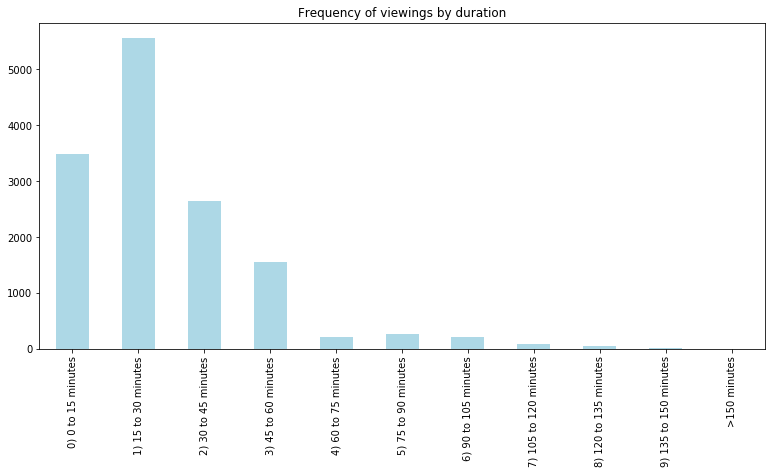

In [155]:

# Create duration grouped column using NUMPY SELECT function (vectorised)  -- WAY FASTER THAN APPLY!!!!#

#Minute intervals (e.g. 15 = 15 minute intervals)
groupby_min = 15
#How many groups required?
groups = 10
#Ensure the stop group is divisible by 15
stop_at_min = groups*groupby_min

#Create automatic bandings of minutes ("Duration in Minutes") depending on info entered above
conditions = []
choices = []
for n,i in enumerate([*range(groupby_min, stop_at_min+1, groupby_min)]):
    conditions.append(df_netflix['Duration in Minutes'] <= i)
    choices.append(str(n)+") "+str(i-groupby_min) + " to " + str(i) + " minutes")

df_netflix['Duration Grouped'] = np.select(conditions , choices, default=">"+str(stop_at_min)+' minutes')

df_netflix['Duration Grouped'].value_counts().sort_index().plot(kind='bar',
                                                                figsize=(13,6),
                                                                color='lightblue',
                                                                title="Frequency of viewings by duration")

TV shows upto 30 minutes are the most frequently viewed.

There seem to be a small number of films which had a duration of over 135 minutes (2 and a quarter hours).  
Lets see what these were and who watched the longest one!

In [156]:
dataset = df_netflix.loc[(df_netflix['Duration in Minutes'] >=135),['Profile Name', 'Title', 'Device Type Group', 'Duration']].sort_values(by = 'Duration', ascending = False).reset_index(drop= True)
display(dataset)

longest_viewing = dataset.loc[0,['Profile Name', 'Title', 'Duration']]
md("<br>It looks like the crown for viewing the longest film goes to **{}**!<br>It took **{}** to watch '**{}**'.".format(longest_viewing['Profile Name'], longest_viewing['Duration'], longest_viewing['Title']))

Profile Name                                              Title Device Type Group  Duration
0   Rosie and Greg              The Lord of the Rings: The Two Towers                TV  02:51:47
1   Rosie and Greg  The Lord of the Rings: The Fellowship of the Ring                TV  02:50:29
2            Jenny                                             Zodiac                TV  02:34:49
3           Steven                                          Gladiator          Computer  02:28:32
4           Steven                                       The Revenant          Computer  02:26:49
5   Maria and Rick                                          Prisoners                TV  02:26:13
6             Greg                     Transformers: Dark of the Moon            Tablet  02:25:59
7   Maria and Rick                            Chitty Chitty Bang Bang                TV  02:24:42
8   Maria and Rick                                  The Da Vinci Code                TV  02:21:35
9   Maria and Rick                                          Inception                TV  02:21:20
10  Rosie and Greg                      Mission: Impossible - Fallout                TV  02:21:09
11           Rosie                      Robin Hood: Prince of Thieves                TV  02:18:20
12          Steven                                        The Martian          Computer  02:16:27
13           Rosie                                     The Green Mile                TV  02:16:17
14           Rosie                                  Avengers Assemble                TV  02:15:16

<br>It looks like the crown for viewing the longest film goes to **Rosie and Greg**!<br>It took **02:51:47** to watch '**The Lord of the Rings: The Two Towers**'.

Lets now see when people are watching the most

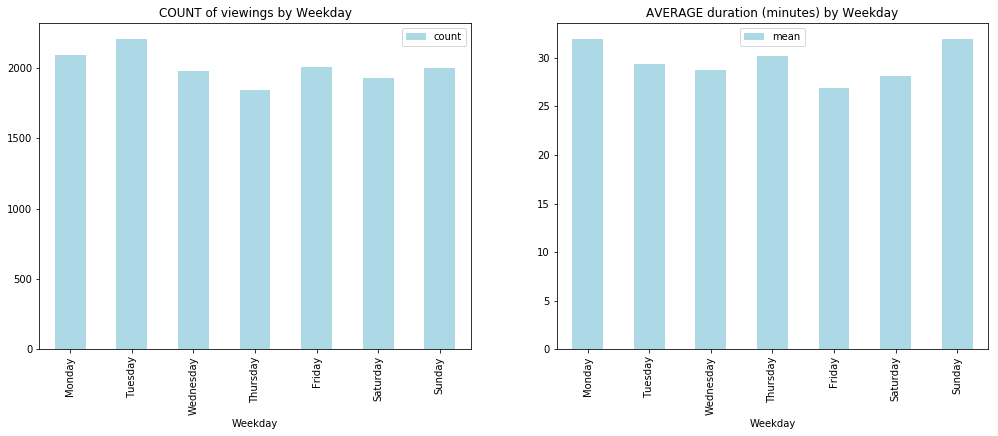

The day with the most individual viewings is **Tuesday** and the day with the least is **Thursday**.

However, on average the longest duration per individual viewing takes place on **Sunday** (31.96 minutes) and the shortest on **Friday** (26.85 minutes).<br><br>

Interesting, now lets see what time of day people start to watch.<br>

In [157]:
## Create date variables for graphs ##
#Weekday
cats_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_netflix['Weekday'] = df_netflix['Start Time'].dt.strftime('%A').astype('category').cat.set_categories(cats_days)
#Month
cats_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_netflix['Month'] = df_netflix['Start Time'].dt.strftime('%b').astype('category').cat.set_categories(cats_month)
#Year, and Year Month
df_netflix['Year'] = df_netflix['Start Time'].dt.strftime('%Y')
df_netflix['Year Month'] = df_netflix['Start Time'].dt.strftime('%Y %m')

#Add hour of day & some other time related columns for analysis later
cats_hour = ['00','01','02','03','04','05','06','07','08','09','10','11',
            '12','13','14','15','16','17','18','19','20','21','22','23']
df_netflix['Hour of Day'] = df_netflix['Start Time'].dt.strftime("%H").astype('category').cat.set_categories(cats_hour)

#Count viewings by weekday and plot
df_weekday_dur = df_netflix.groupby('Weekday')['Duration in Minutes'].agg(['count', 'sum', 'mean']).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2)
#Count
pd1 = df_weekday_dur.plot.bar(x = "Weekday",
                              y = "count",
                                ax = ax1,
                                figsize = (17,6),
                                title = "COUNT of viewings by Weekday", 
                                color = "lightblue",)

#Average
pd2 = df_weekday_dur.plot.bar(x = "Weekday",
                        y = "mean",
                        ax = ax2,
                       figsize = (17,6),
                       title = "AVERAGE duration (minutes) by Weekday", 
                       color = "lightblue")

plt.show()

df_most_viewing = df_weekday_dur.loc[df_weekday_dur['count'].idxmax(),['Weekday']][0]
df_least_viewing = df_weekday_dur.loc[df_weekday_dur['count'].idxmin(),['Weekday']][0]
df_most_dur_day = df_weekday_dur.loc[df_weekday_dur['mean'].idxmax(),['Weekday']][0]
df_most_dur = df_weekday_dur.loc[df_weekday_dur['mean'].idxmax(),['mean']][0].round(2)
df_least_dur_day = df_weekday_dur.loc[df_weekday_dur['mean'].idxmin(),['Weekday']][0]
df_least_dur = df_weekday_dur.loc[df_weekday_dur['mean'].idxmin(),['mean']][0].round(2)

display(md("The day with the most individual viewings is **{}** and the day with the least is **{}**.".format(df_most_viewing,df_least_viewing)))
display(md("However, on average the longest duration per individual viewing takes place on **{}** ({} minutes) and the shortest on **{}** ({} minutes).<br><br>".format(df_most_dur_day,df_most_dur,df_least_dur_day,df_least_dur)))
display(md("Interesting, now lets see what time of day people start to watch.<br>"))

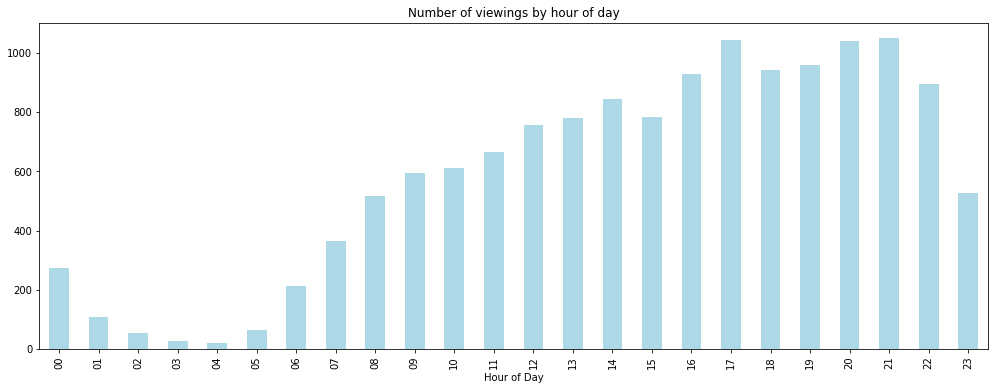

The most popular time to start watching is **21** and the least popular is **04**.<br><br>

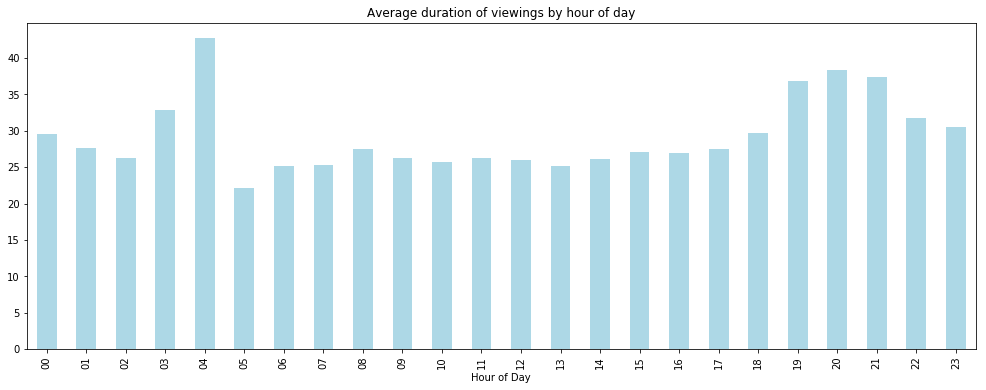

The average viewing duration is highest for shows which start at **04** and the lowest duration is **05**.

The higher average duration later in the day is probably due to more films being watched. 4am longest duration!? Perhaps this is due to low volume of things being watched at that time and those who did watch put on a film?

In [158]:
#Count viewings by hour of day and plot
df_time_count = df_netflix.groupby('Hour of Day')['Duration in Minutes'].agg(['mean', 'count']).reset_index()

df_time_count.plot.bar(x = "Hour of Day", 
                       y = 'count',
                       legend = False,
                       figsize = (17,6),
                       title = "Number of viewings by hour of day", 
                       color = "lightblue")
plt.xlabel('Hour of Day')
plt.show()

df_most_count = df_time_count.loc[df_time_count['count'].idxmax(),['Hour of Day']][0]
df_least_count = df_time_count.loc[df_time_count['count'].idxmin(),['Hour of Day']][0]

display(md("The most popular time to start watching is **{}** and the least popular is **{}**.<br><br>".format(df_most_count,df_least_count)))

df_time_count.plot.bar(x = "Hour of Day", 
                       y = 'mean',
                       legend = False,
                       figsize = (17,6),
                       title = "Average duration of viewings by hour of day", 
                       color = "lightblue")
plt.xlabel('Hour of Day')
plt.show()

df_most_dur = df_time_count.loc[df_time_count['mean'].idxmax(),['Hour of Day']][0]
df_least_dur = df_time_count.loc[df_time_count['mean'].idxmin(),['Hour of Day']][0]

display(md("The average viewing duration is highest for shows which start at **{}** and the lowest duration is **{}**.".format(df_most_dur,df_least_dur)))
display(md("The higher average duration later in the day is probably due to more films being watched. 4am longest duration!? Perhaps this is due to low volume of things being watched at that time and those who did watch put on a film?"))


What month and year had the highest average viewing times.

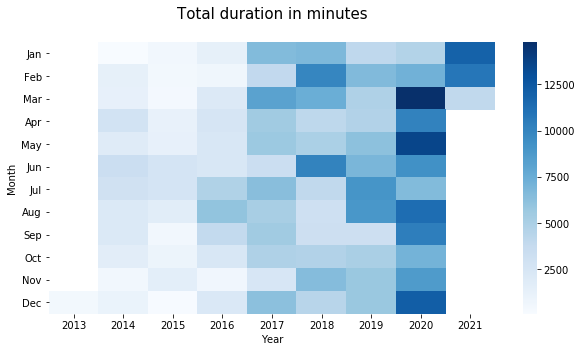

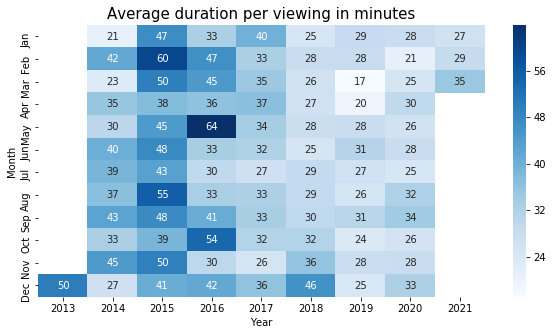

In [159]:
plt.figure(figsize=(10,5))
df_tot_dur = df_netflix.groupby(['Year','Month'])['Duration in Minutes'].agg('sum').reset_index().sort_values(by = ['Year','Month'])
df_tot_dur = df_tot_dur.pivot("Month", "Year", "Duration in Minutes")
sns.heatmap(df_tot_dur, cmap="Blues")
plt.title("Total duration in minutes\n", fontsize =15)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(10,5))
df_avg_duration = df_netflix.groupby(['Year','Month'])['Duration in Minutes'].agg('mean').reset_index().sort_values(by = ['Year','Month'])
df_avg_duration = df_avg_duration.pivot("Month", "Year", "Duration in Minutes")
sns.heatmap(df_avg_duration, cmap="Blues", annot = True)
plt.title("Average duration per viewing in minutes", fontsize =15)
plt.show()

This shows our population is heavily weighted, with most viewings occuring from 2019 onwards. The higher average viewing time in the earlier years will be down to a smaller number of profiles.  Lets check that out.  The first scatter plot is for the whole population, and the following few are for a select number of profiles.

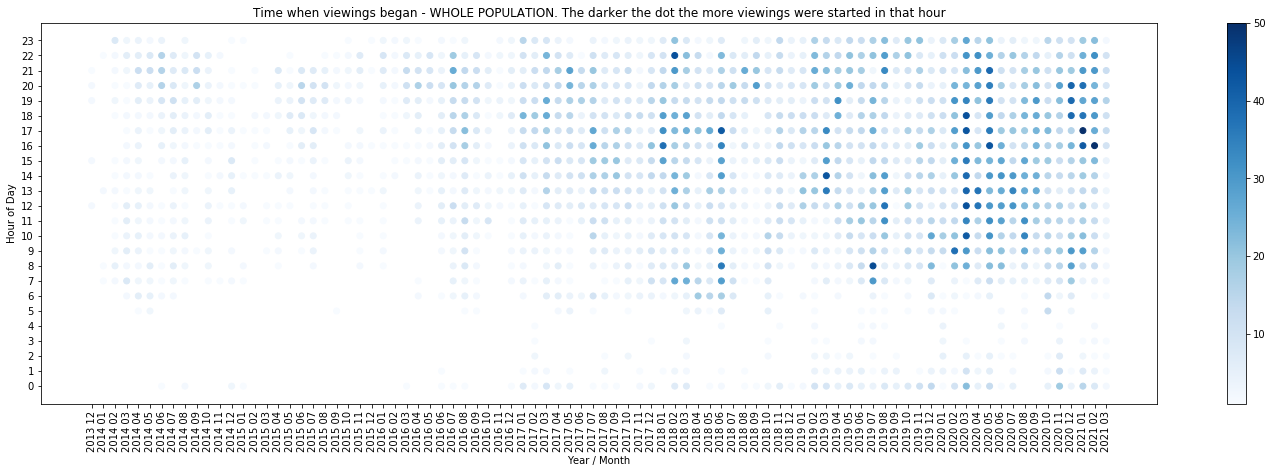

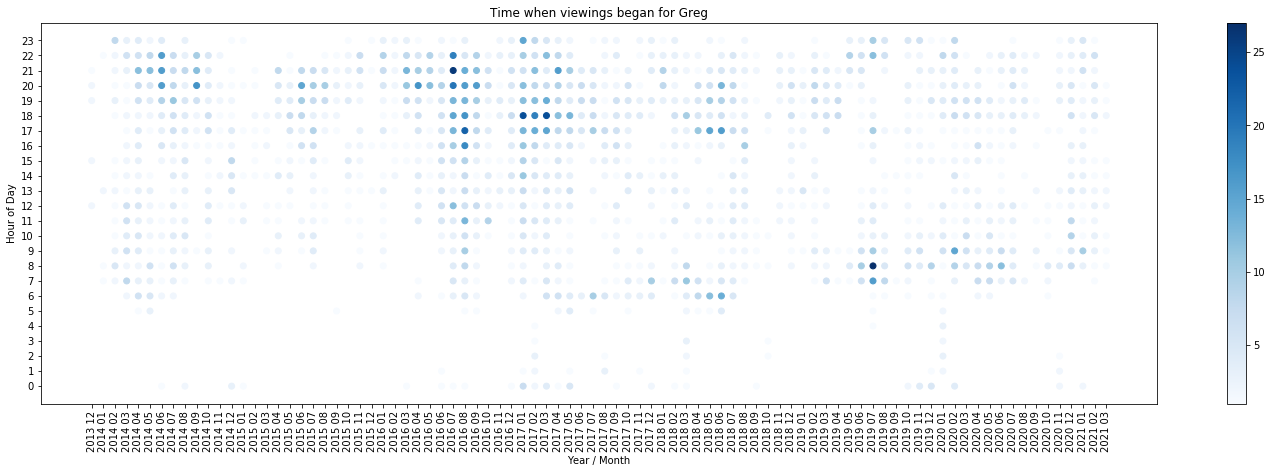

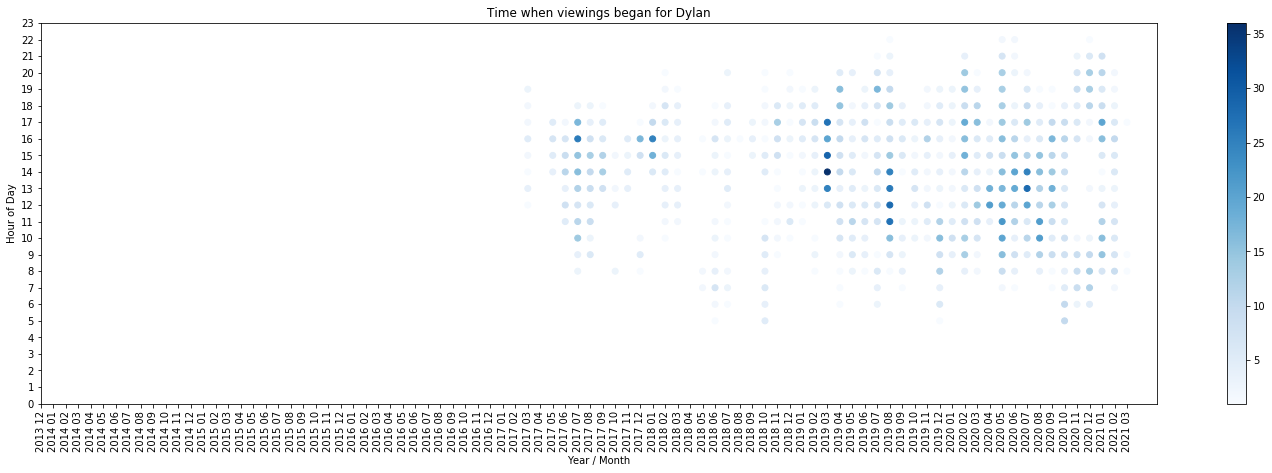

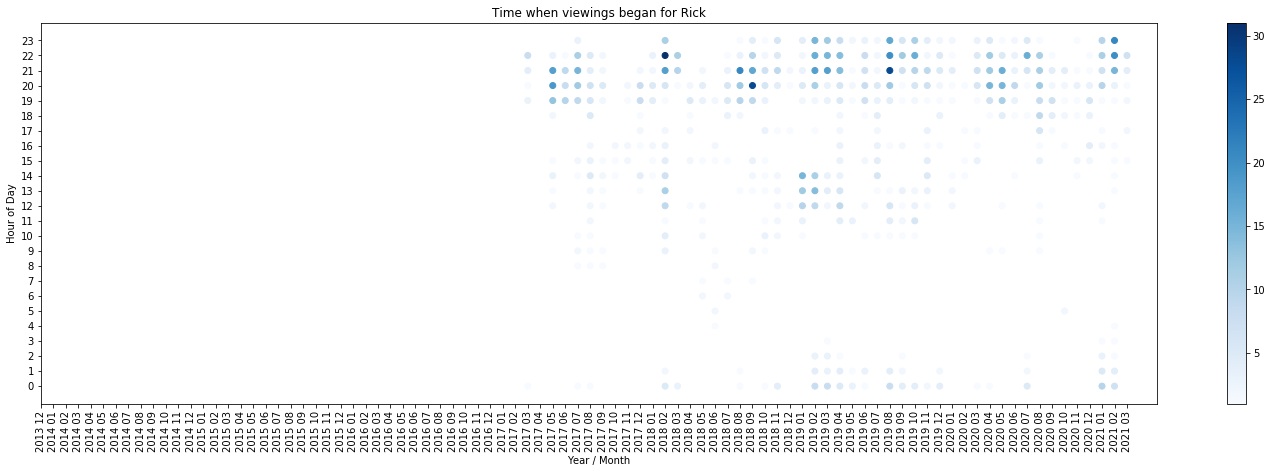

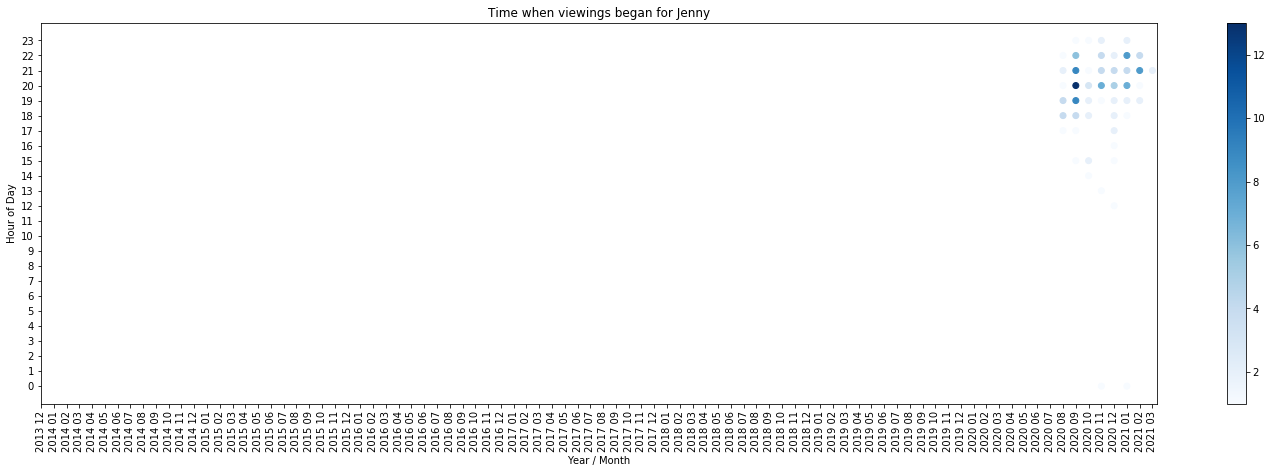

In [160]:
#Count the number of titles watched by month and hour of day for population
srs_all_dates_base = df_netflix.groupby(['Year Month', 'Hour of Day']).Title.agg('count').reset_index()
srs_all_dates_base.sort_values(by = ['Year Month', 'Hour of Day'], inplace = True)

#Create scatter plot like a heat map. Change 'c = ' to Title_pop or Title_individual depending if you want to see the whole population or for the named individual above
plt.figure(figsize=(25, 7))
plt.scatter(x = srs_all_dates_base['Year Month'], 
            y = srs_all_dates_base['Hour of Day'].astype(int), 
            c = srs_all_dates_base['Title'], 
            cmap='Blues')
plt.title("Time when viewings began - WHOLE POPULATION. The darker the dot the more viewings were started in that hour")
plt.ylabel('Hour of Day')
plt.xlabel('Year / Month')
plt.yticks(np.arange(0, 24, step=1))
plt.xticks(rotation=90)
plt.colorbar();
plt.show()

#Count the number of titles watched by month and hour of day for an individual profile 
for name in ['Greg', 'Dylan', 'Rick', 'Jenny']:
    df_filtered = df_netflix.loc[df_netflix['Profile Name'].str.contains(name)]
    df_month_by_hour = df_filtered.groupby(['Year Month','Hour of Day']).Title.agg('count').reset_index()
    
    #Join population and individual counts together
    srs_all_dates = pd.merge(srs_all_dates_base, 
                             df_month_by_hour, 
                             on = ['Year Month','Hour of Day'], 
                             how = 'left', 
                             suffixes=('_pop','_individual'))
   
    #Create scatter plot like a heat map. Change 'c = ' to Title_pop or Title_individual depending if you want to see the whole population or for the named individual above
    plt.figure(figsize=(25, 7))
    plt.scatter(x = srs_all_dates['Year Month'], 
                y = srs_all_dates['Hour of Day'].astype(int), 
                c = srs_all_dates['Title_individual'], 
                cmap='Blues')
    plt.title("Time when viewings began for " + name)
    plt.ylabel('Hour of Day')
    plt.xlabel('Year / Month')
    plt.yticks(np.arange(0, 24, step=1))
    plt.xticks(sorted(df_netflix['Year Month'].unique()), rotation=90)
    plt.xticks(rotation=90)
    plt.colorbar();
    plt.show()

This scatter plot per profile shows that anything watched 2016 and before is pretty much solely down to Greg's sole account. Lets double check that by seeing the earliest date on every profile.

In [161]:
#Earliest date per profile
earliest_prof = df_netflix.groupby('Profile Name')['Start Time'].agg('min').sort_values().dt.strftime('%d %b %Y').reset_index()

display(md("The earliest viewing is by **{}** on **{}**.".format(earliest_prof['Profile Name'][0],earliest_prof['Start Time'][0])))
display(md("The next profile to begin viewing is **{}** on **{}**.".format(earliest_prof['Profile Name'][1],earliest_prof['Start Time'][1])))

earliest_prof

The earliest viewing is by **Greg** on **16 Dec 2013**.

The next profile to begin viewing is **Maria and Rick** on **13 Mar 2017**.

Profile Name   Start Time
0             Greg  16 Dec 2013
1   Maria and Rick  13 Mar 2017
2            Maria  14 Mar 2017
3            Dylan  15 Mar 2017
4            Rosie  29 Aug 2017
5   Rosie and Greg  08 Oct 2017
6             Rick  20 Oct 2018
7            Irene  21 Oct 2018
8           Elliot  17 Jan 2019
9           Stella  21 Mar 2020
10           Brian  25 Aug 2020
11           Jenny  25 Aug 2020
12          Steven  06 Sep 2020

Lets check out what time on each weekday people are watching.

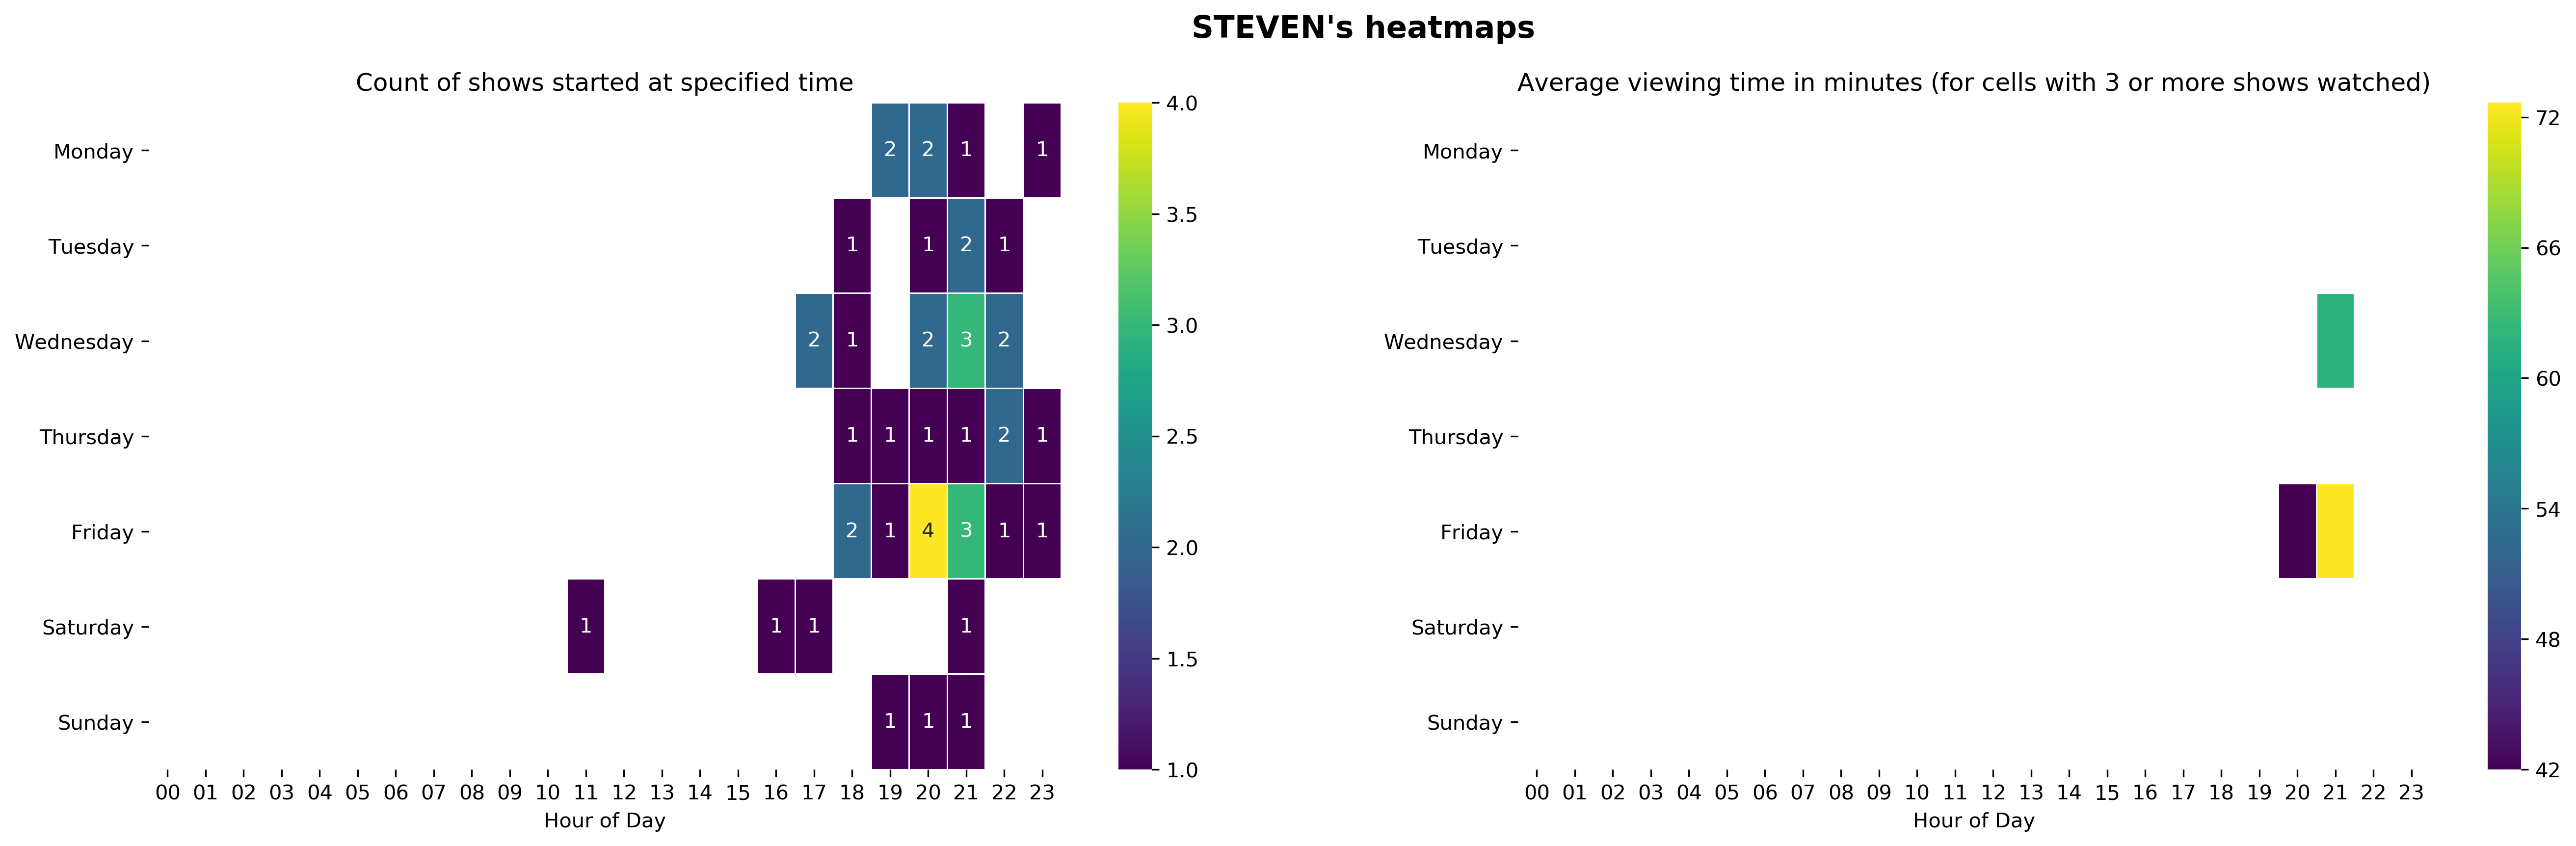

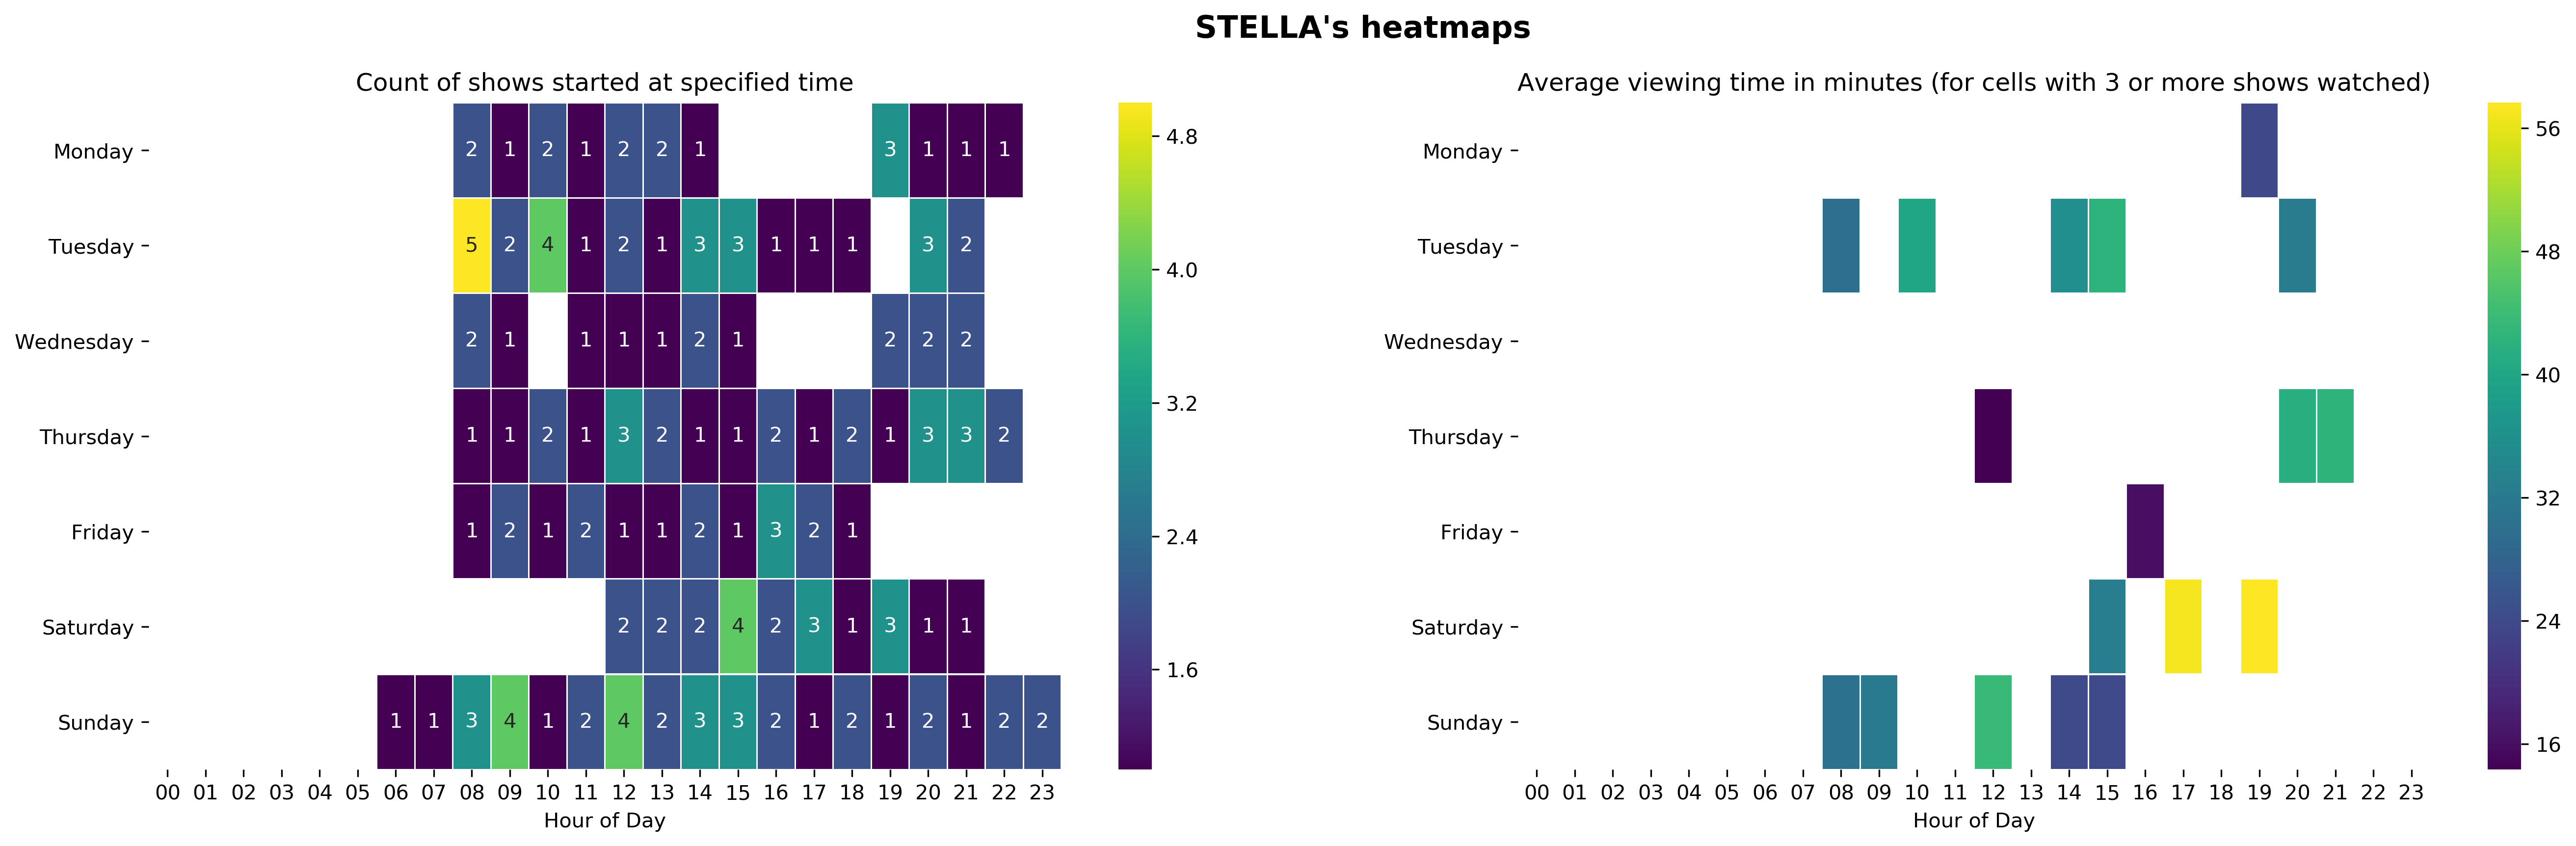

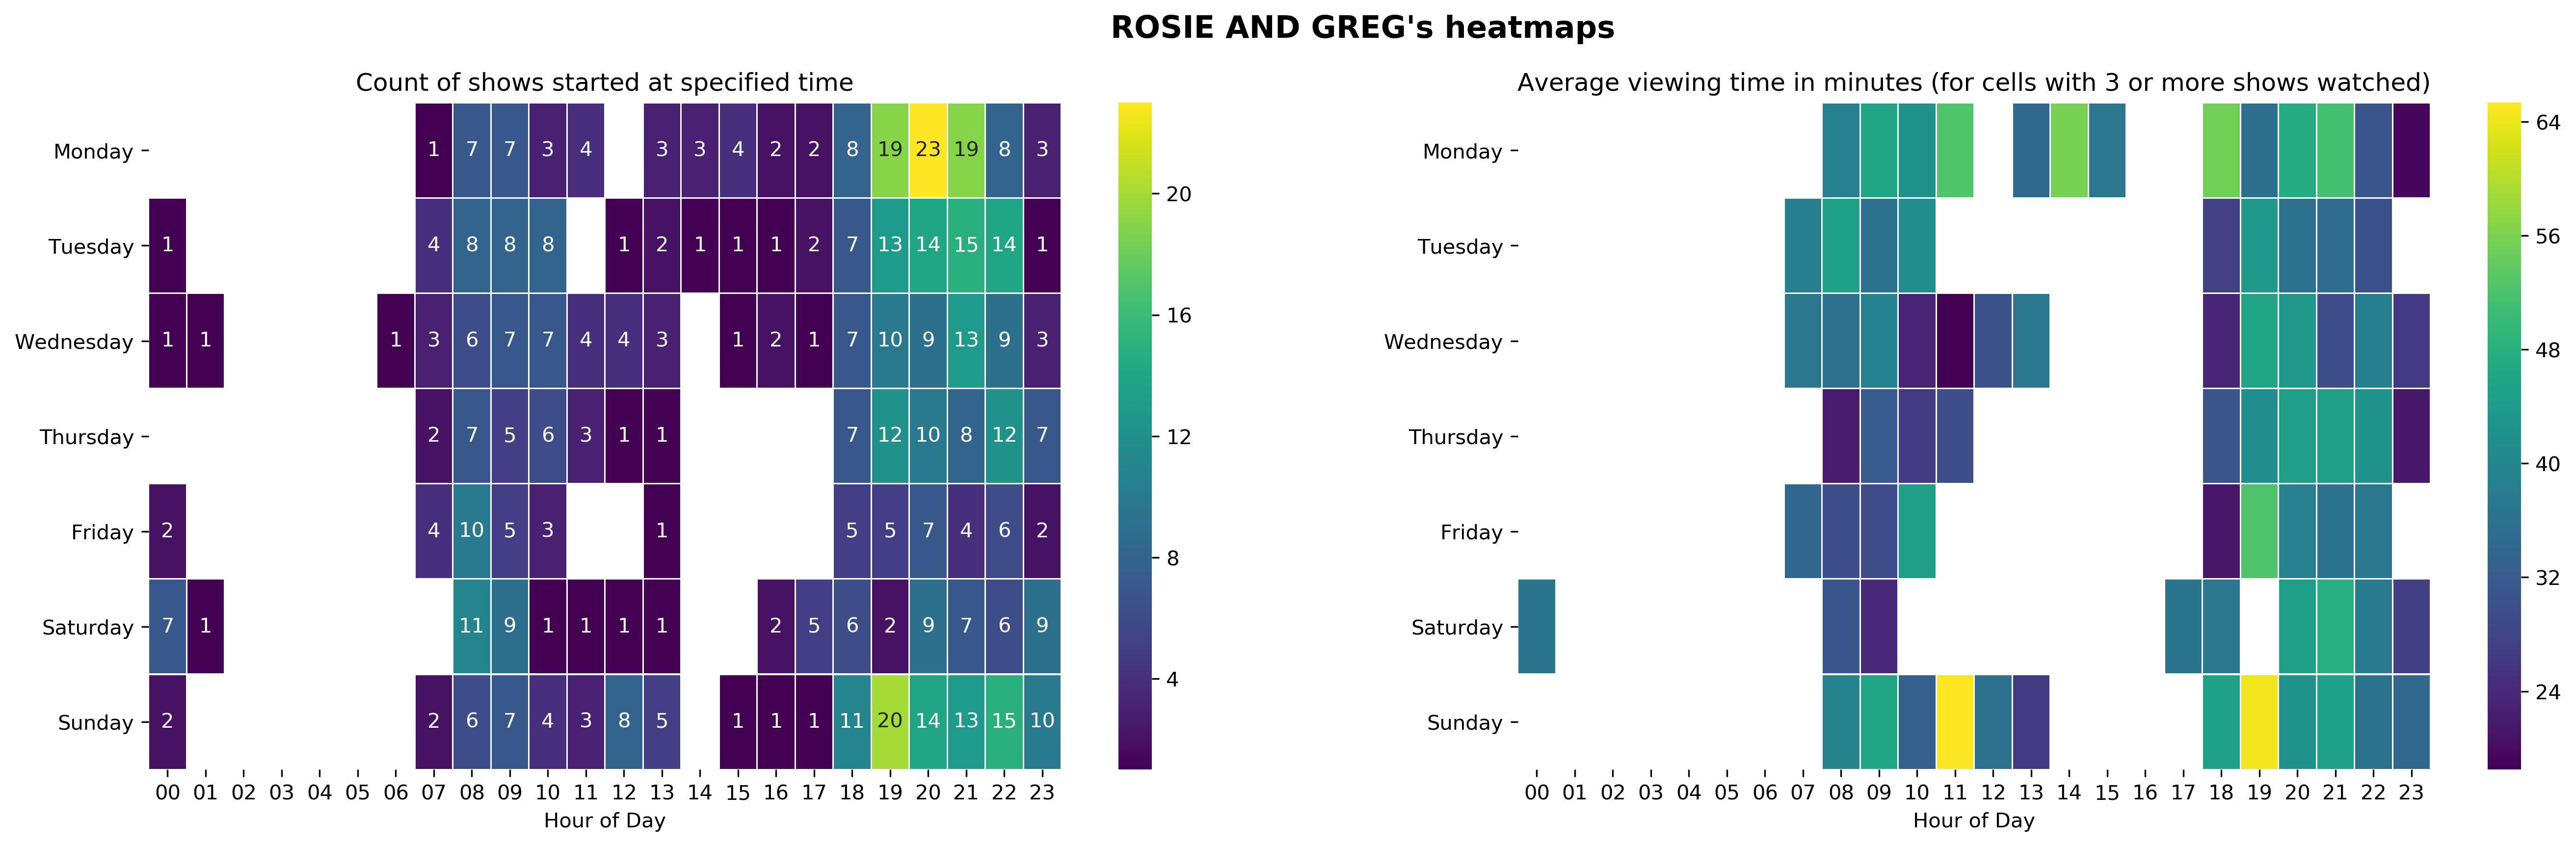

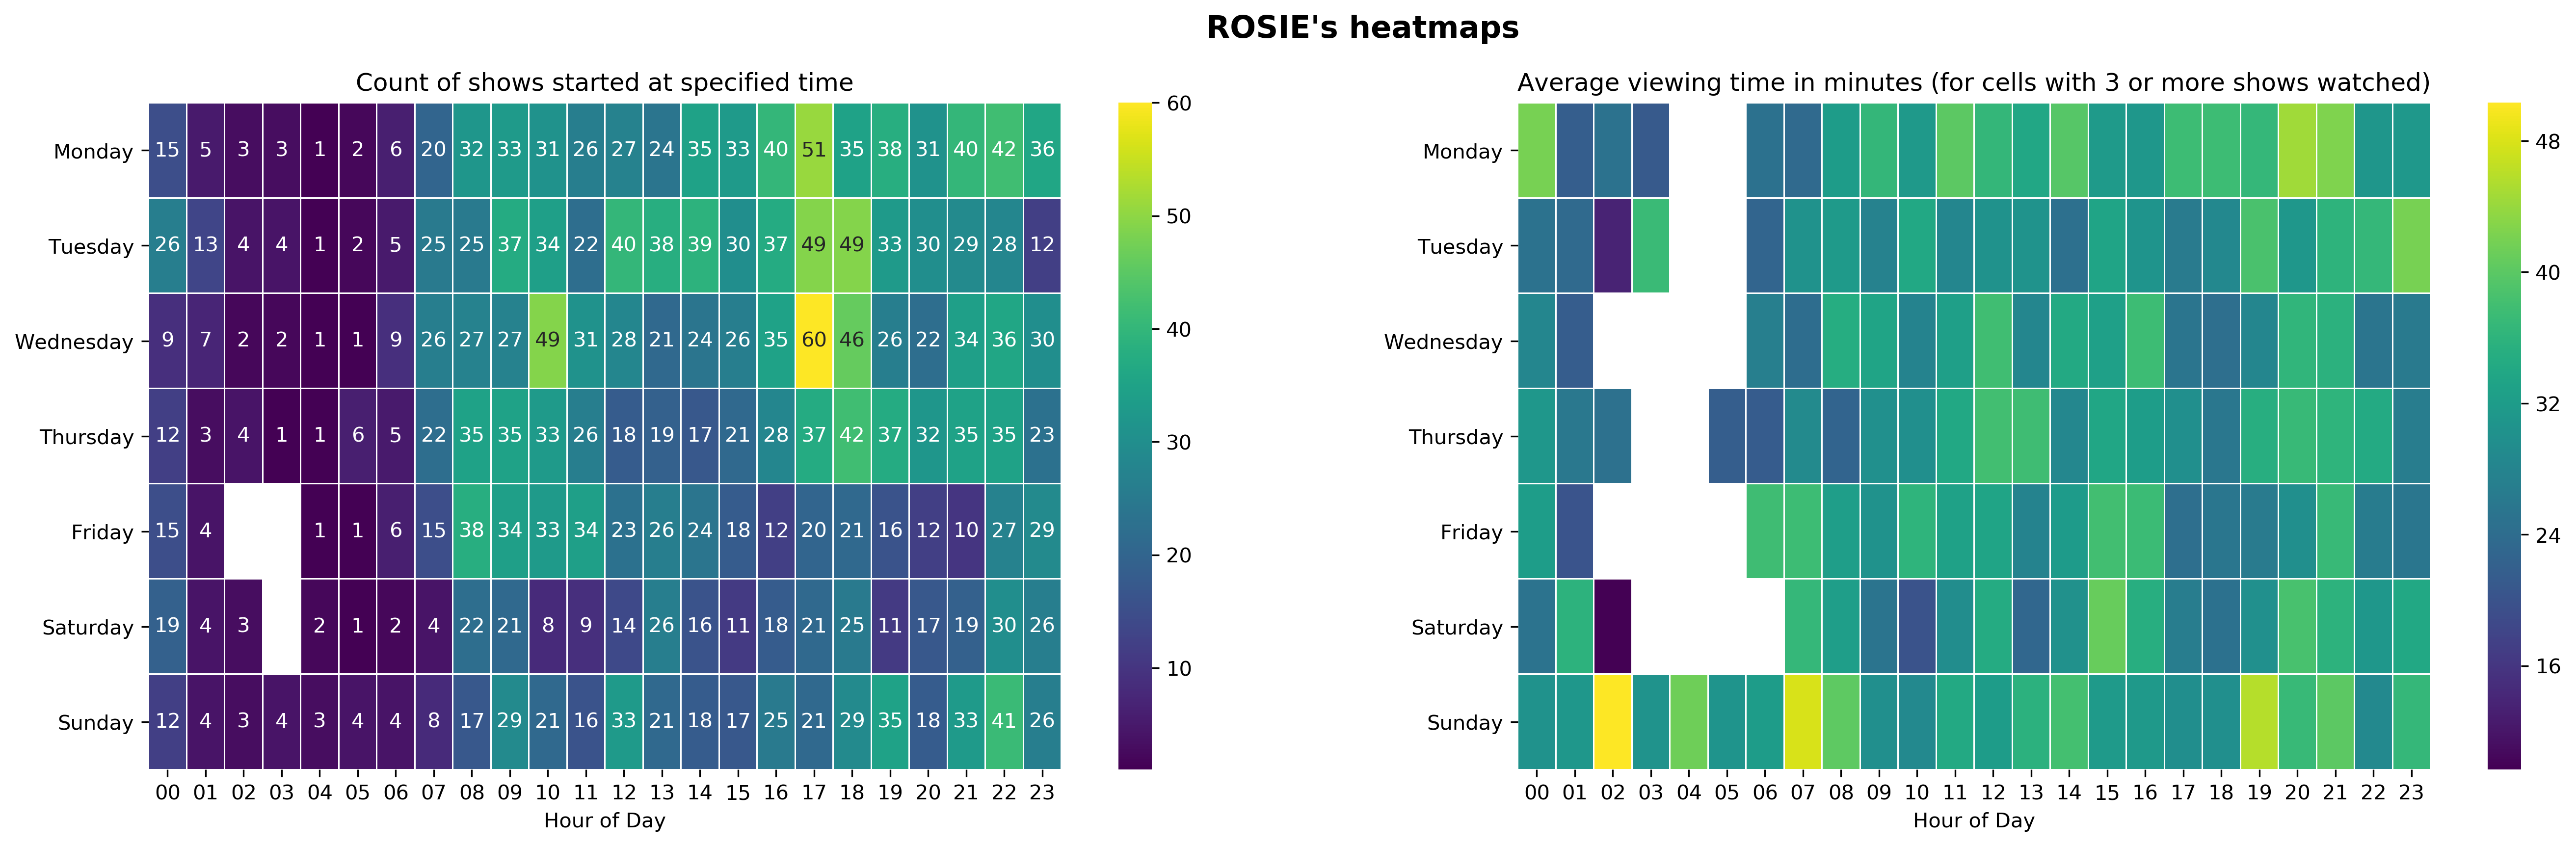

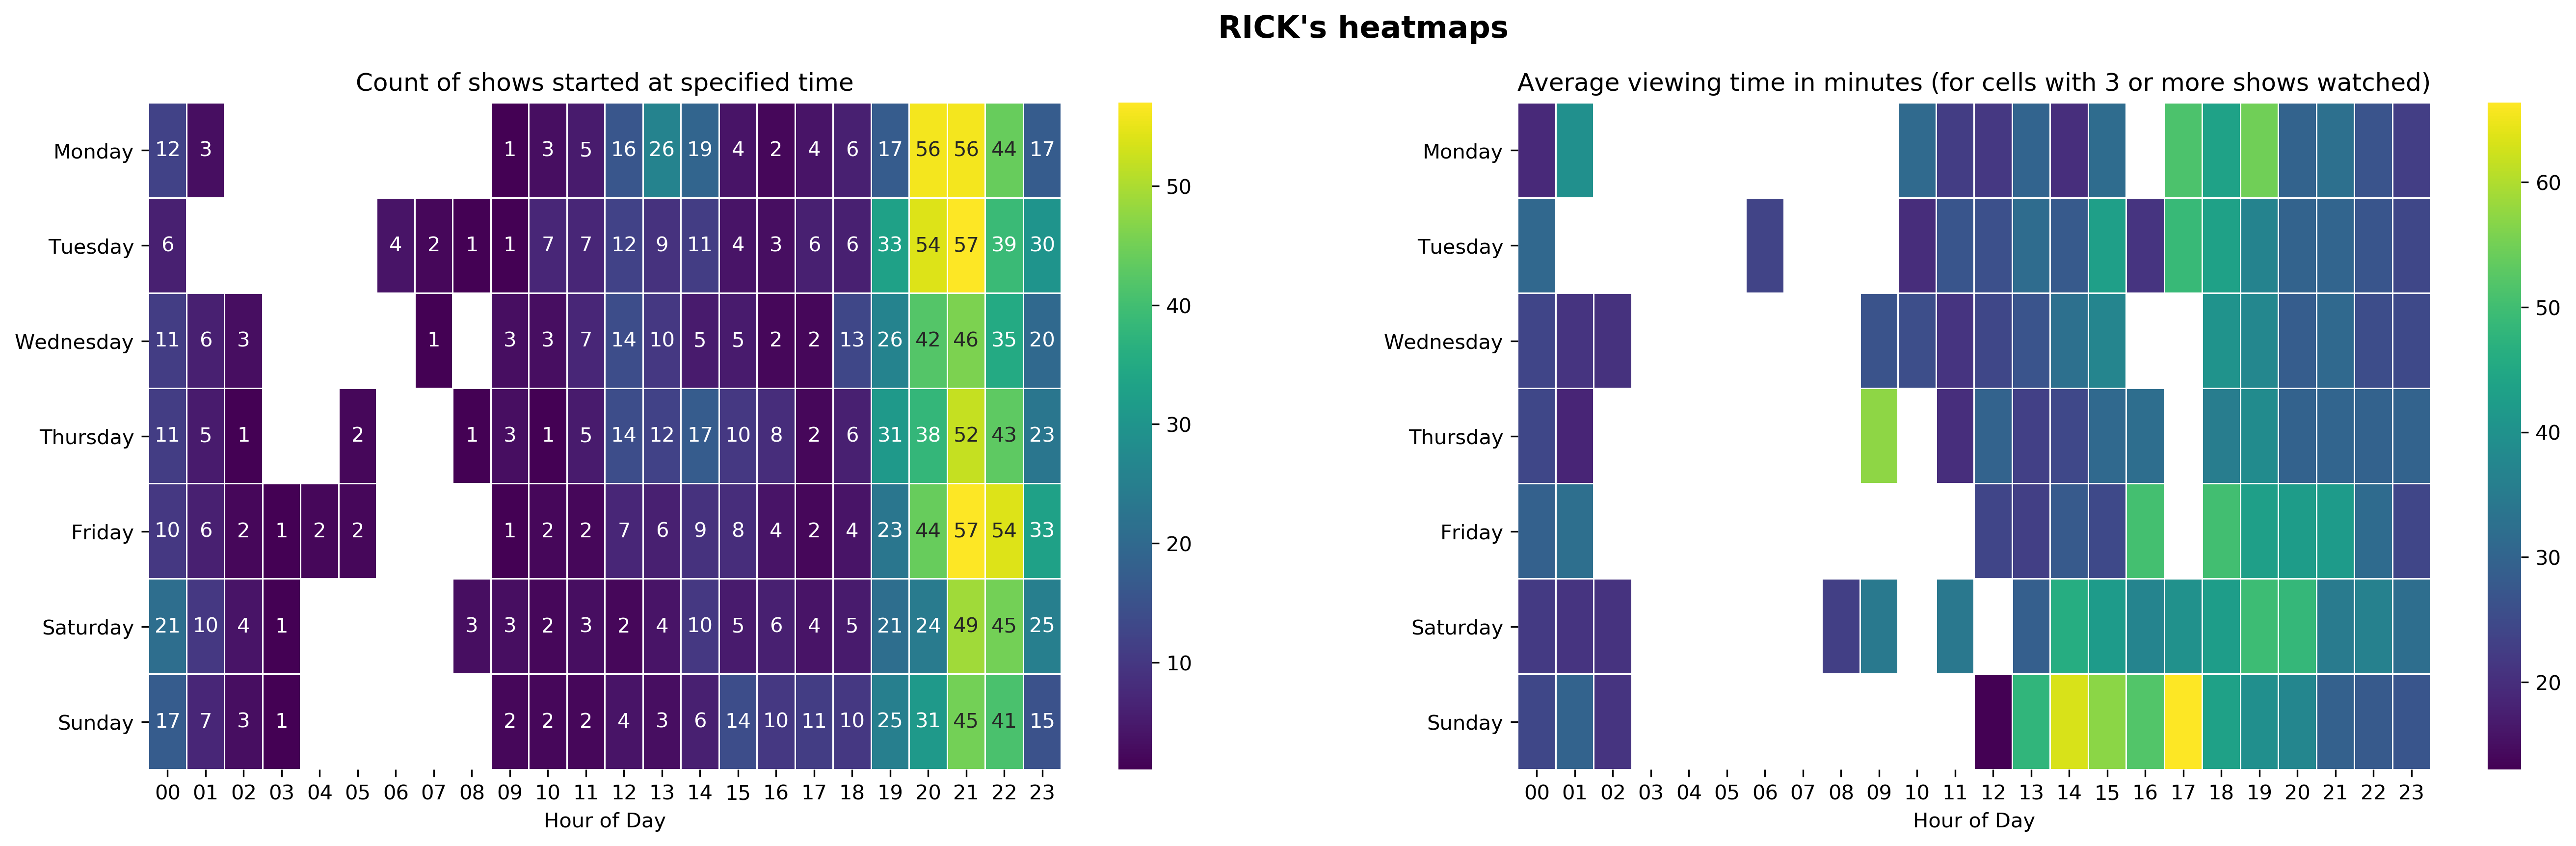

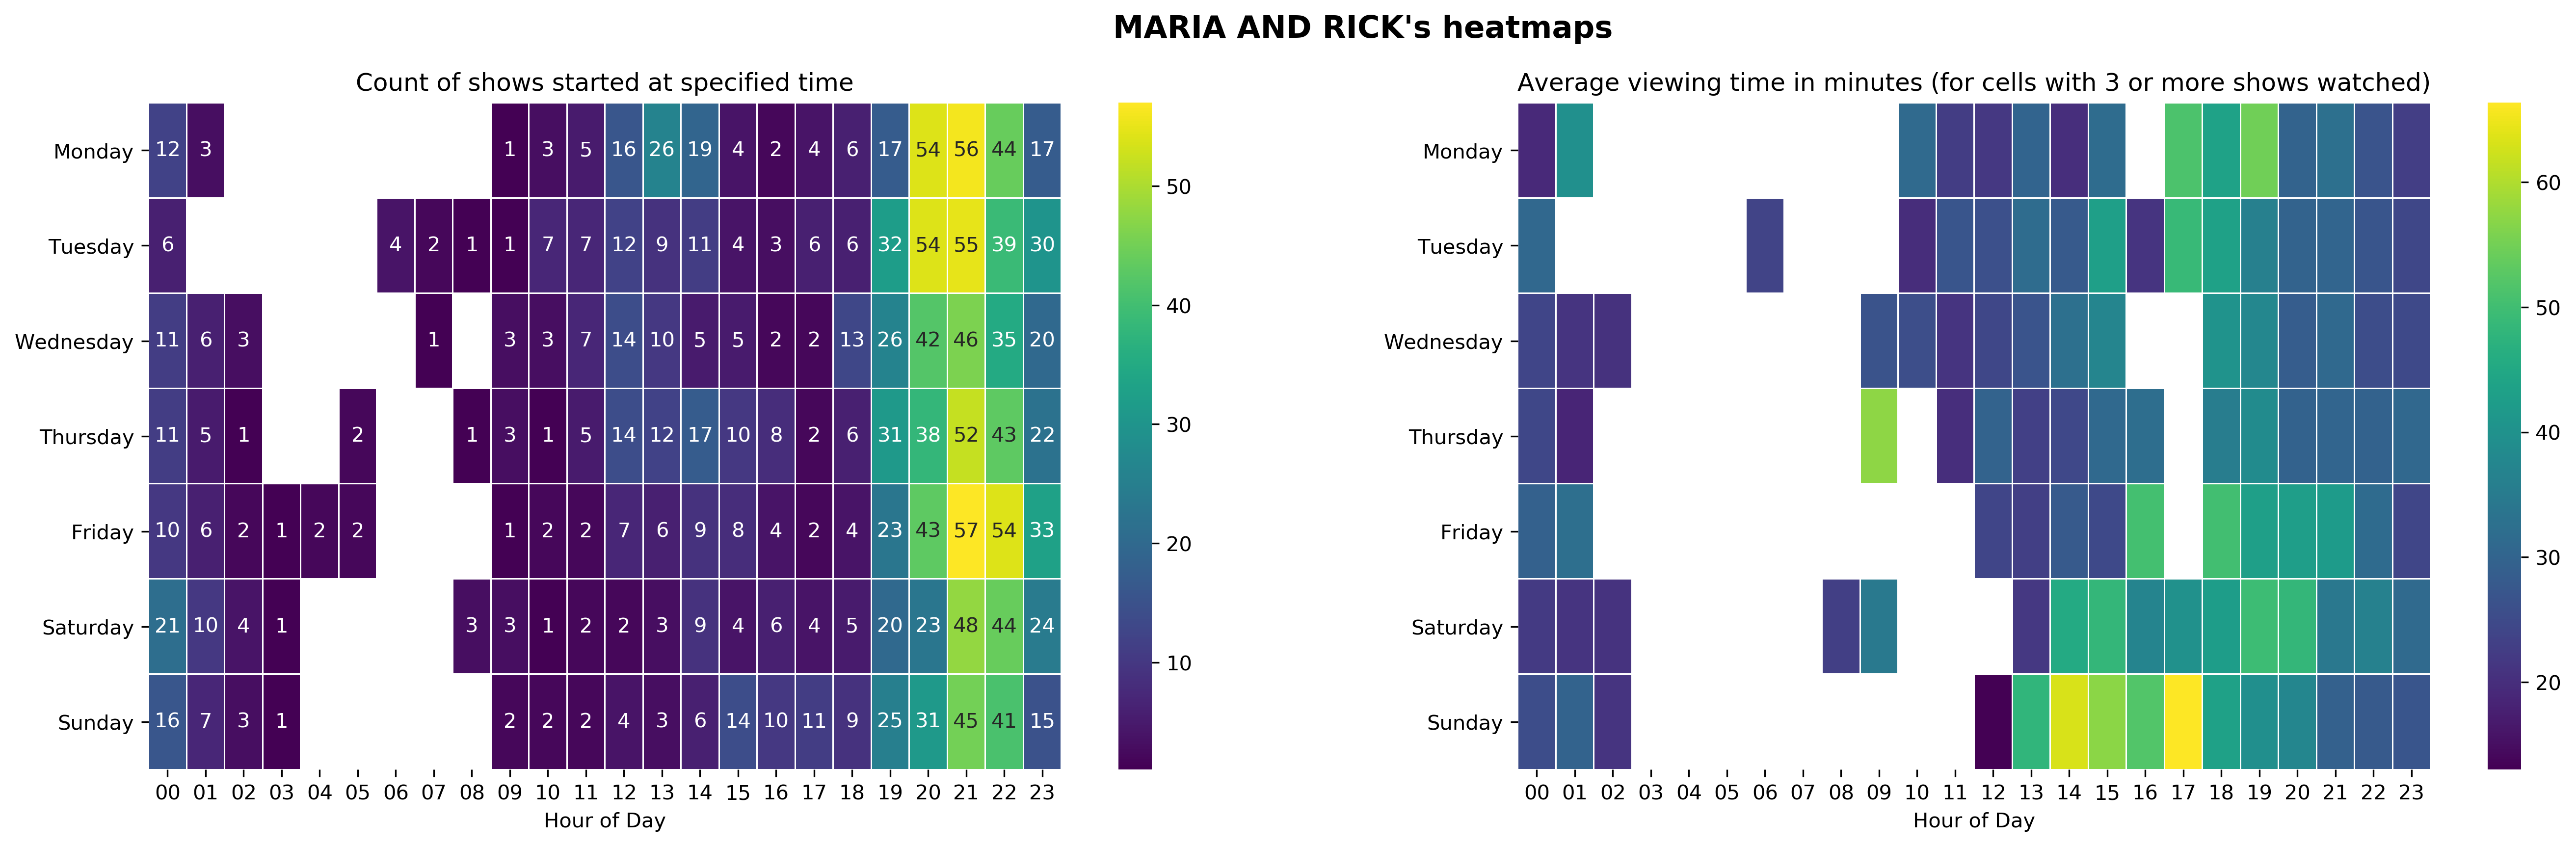

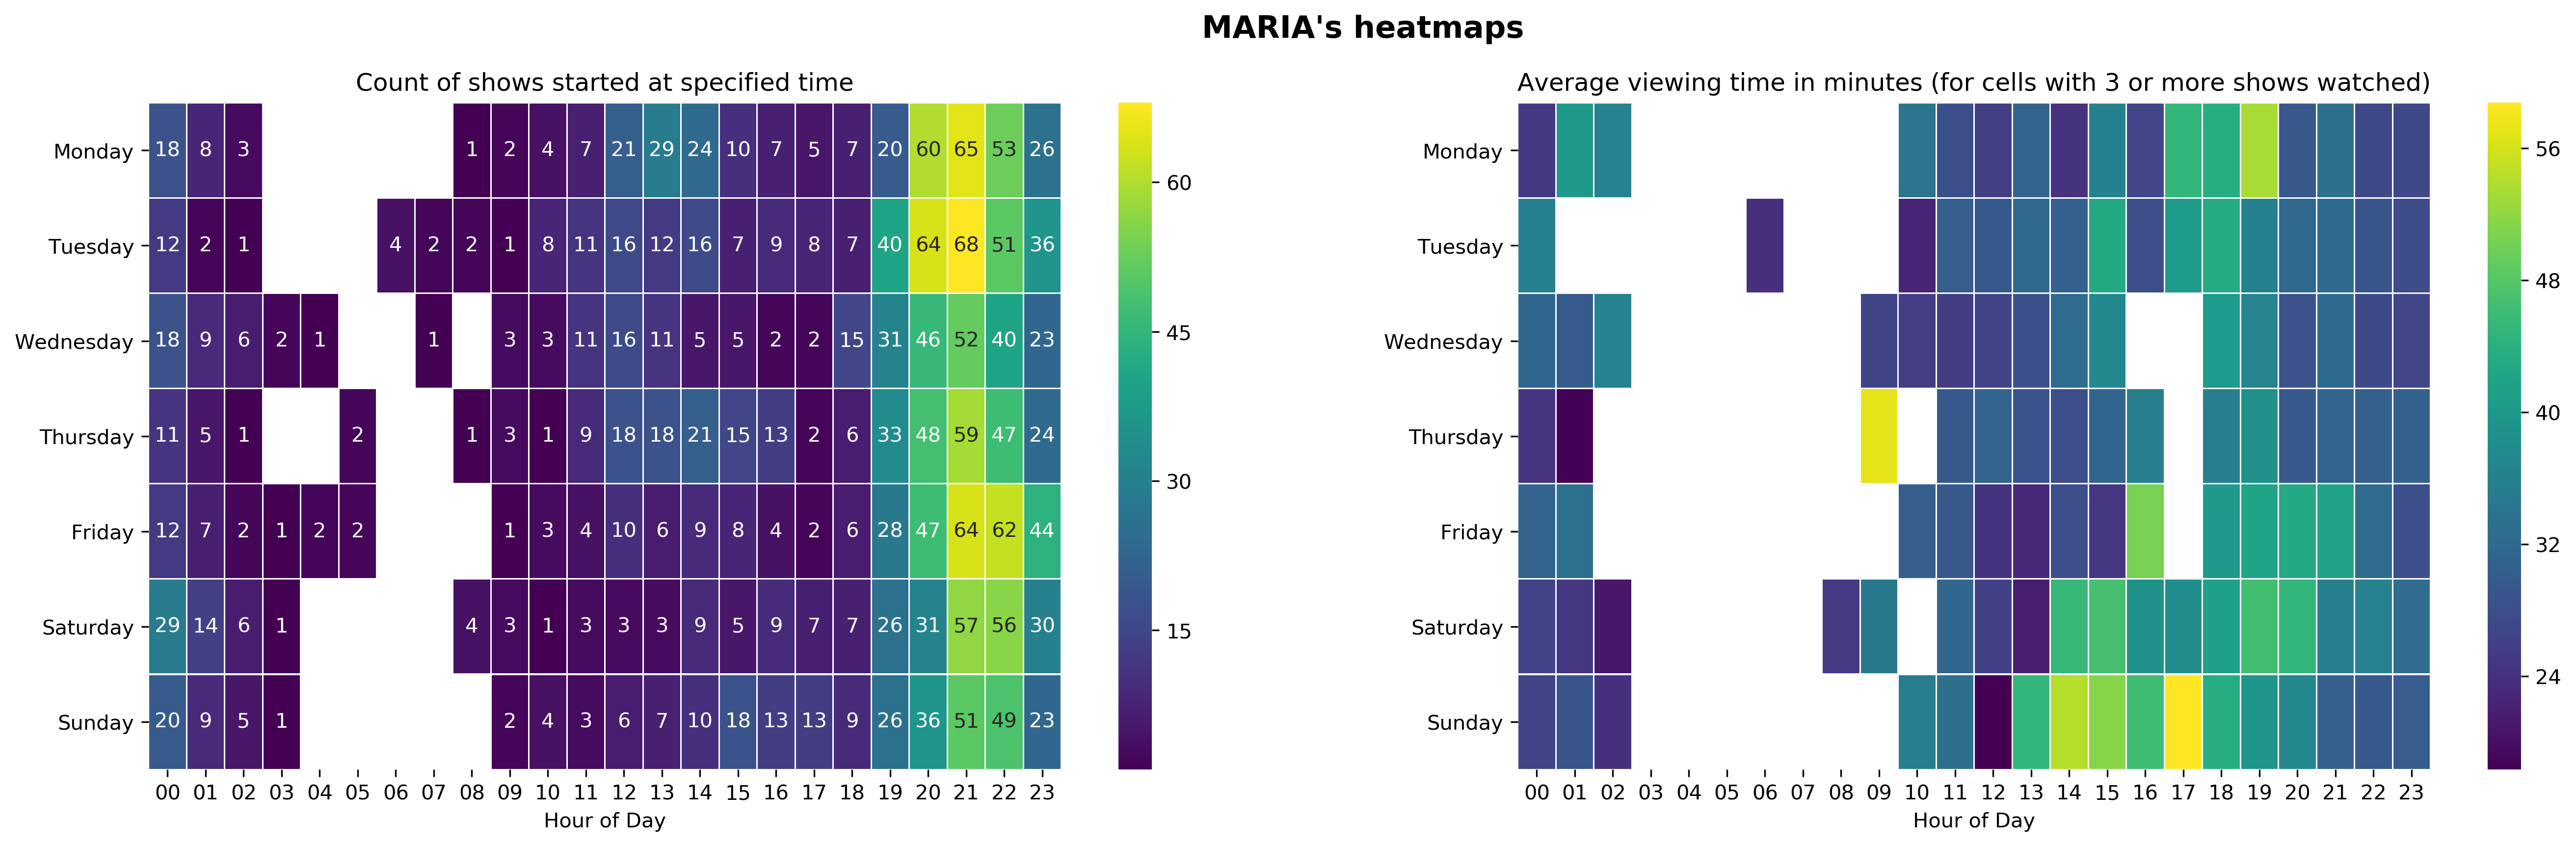

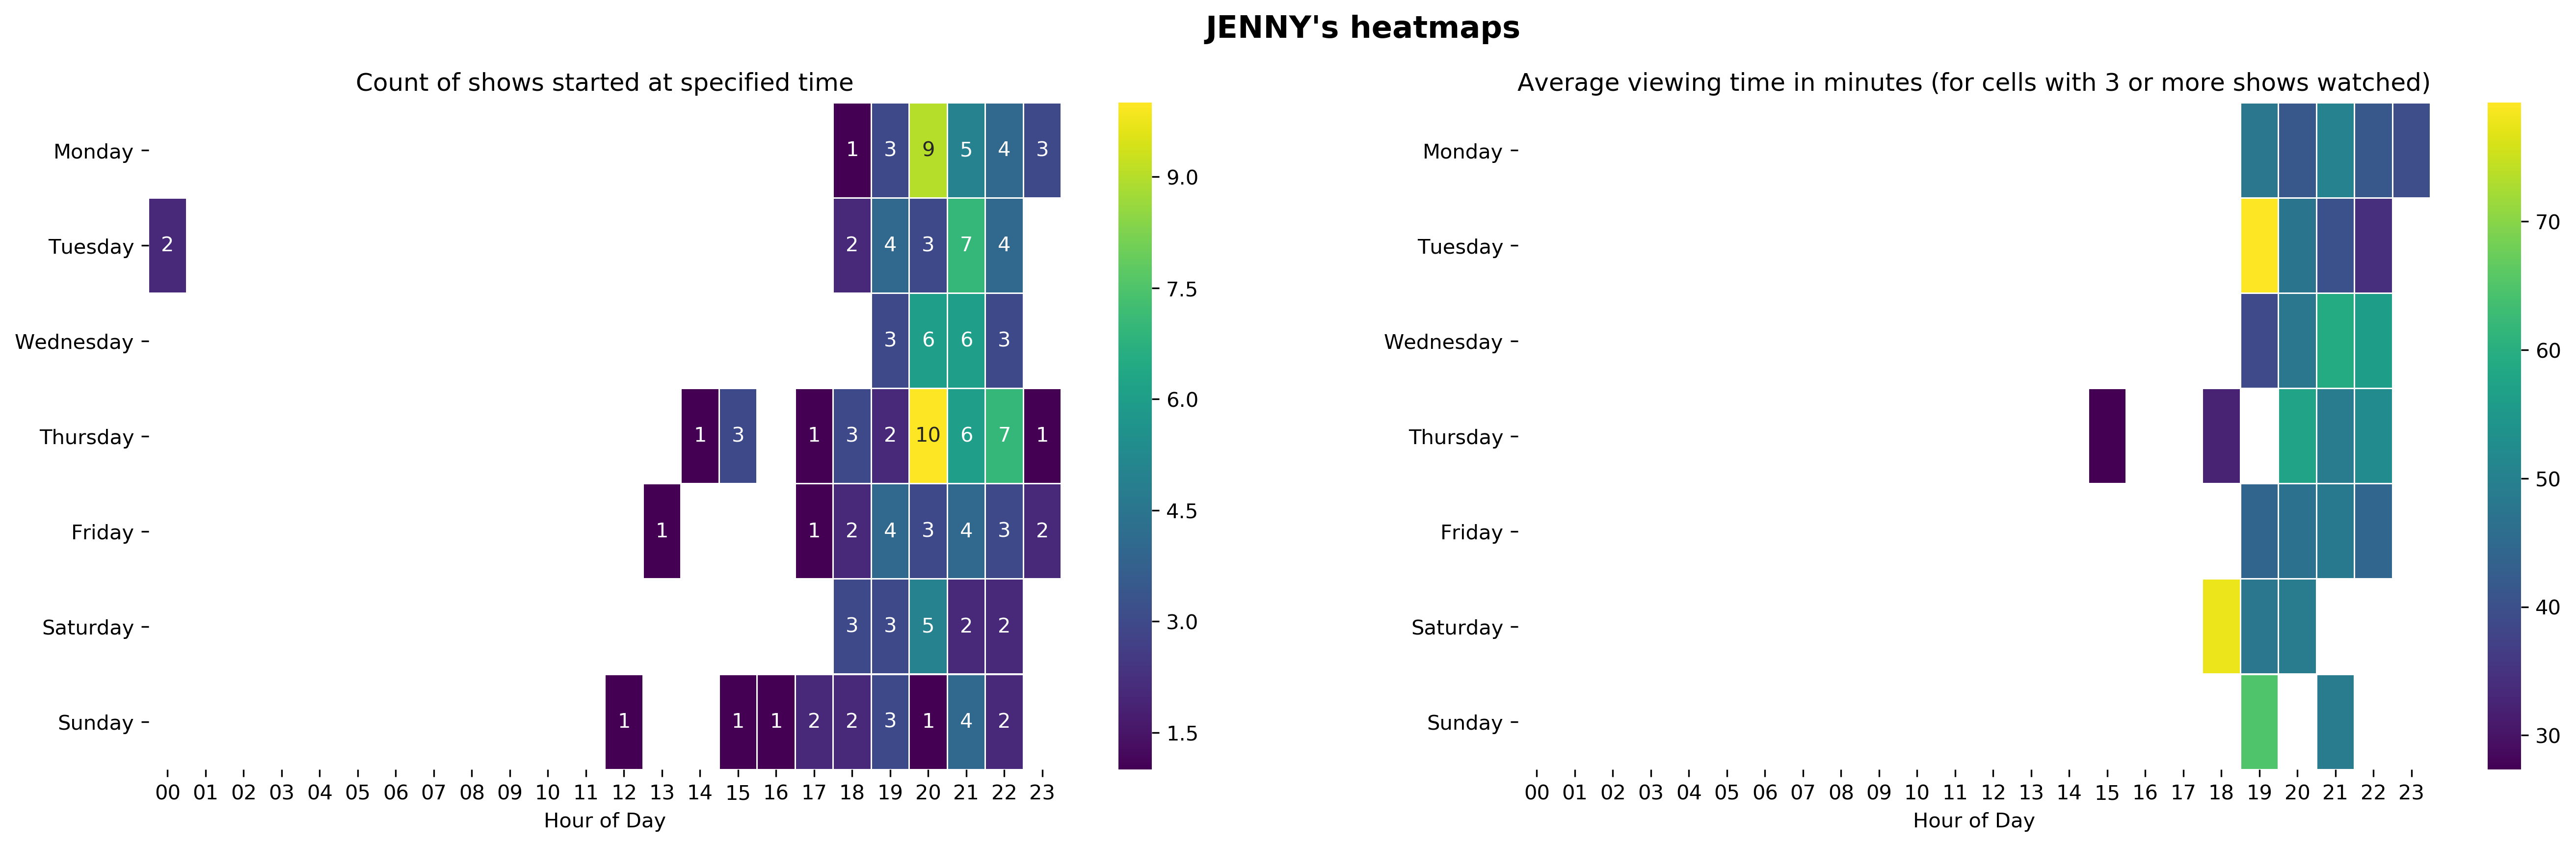

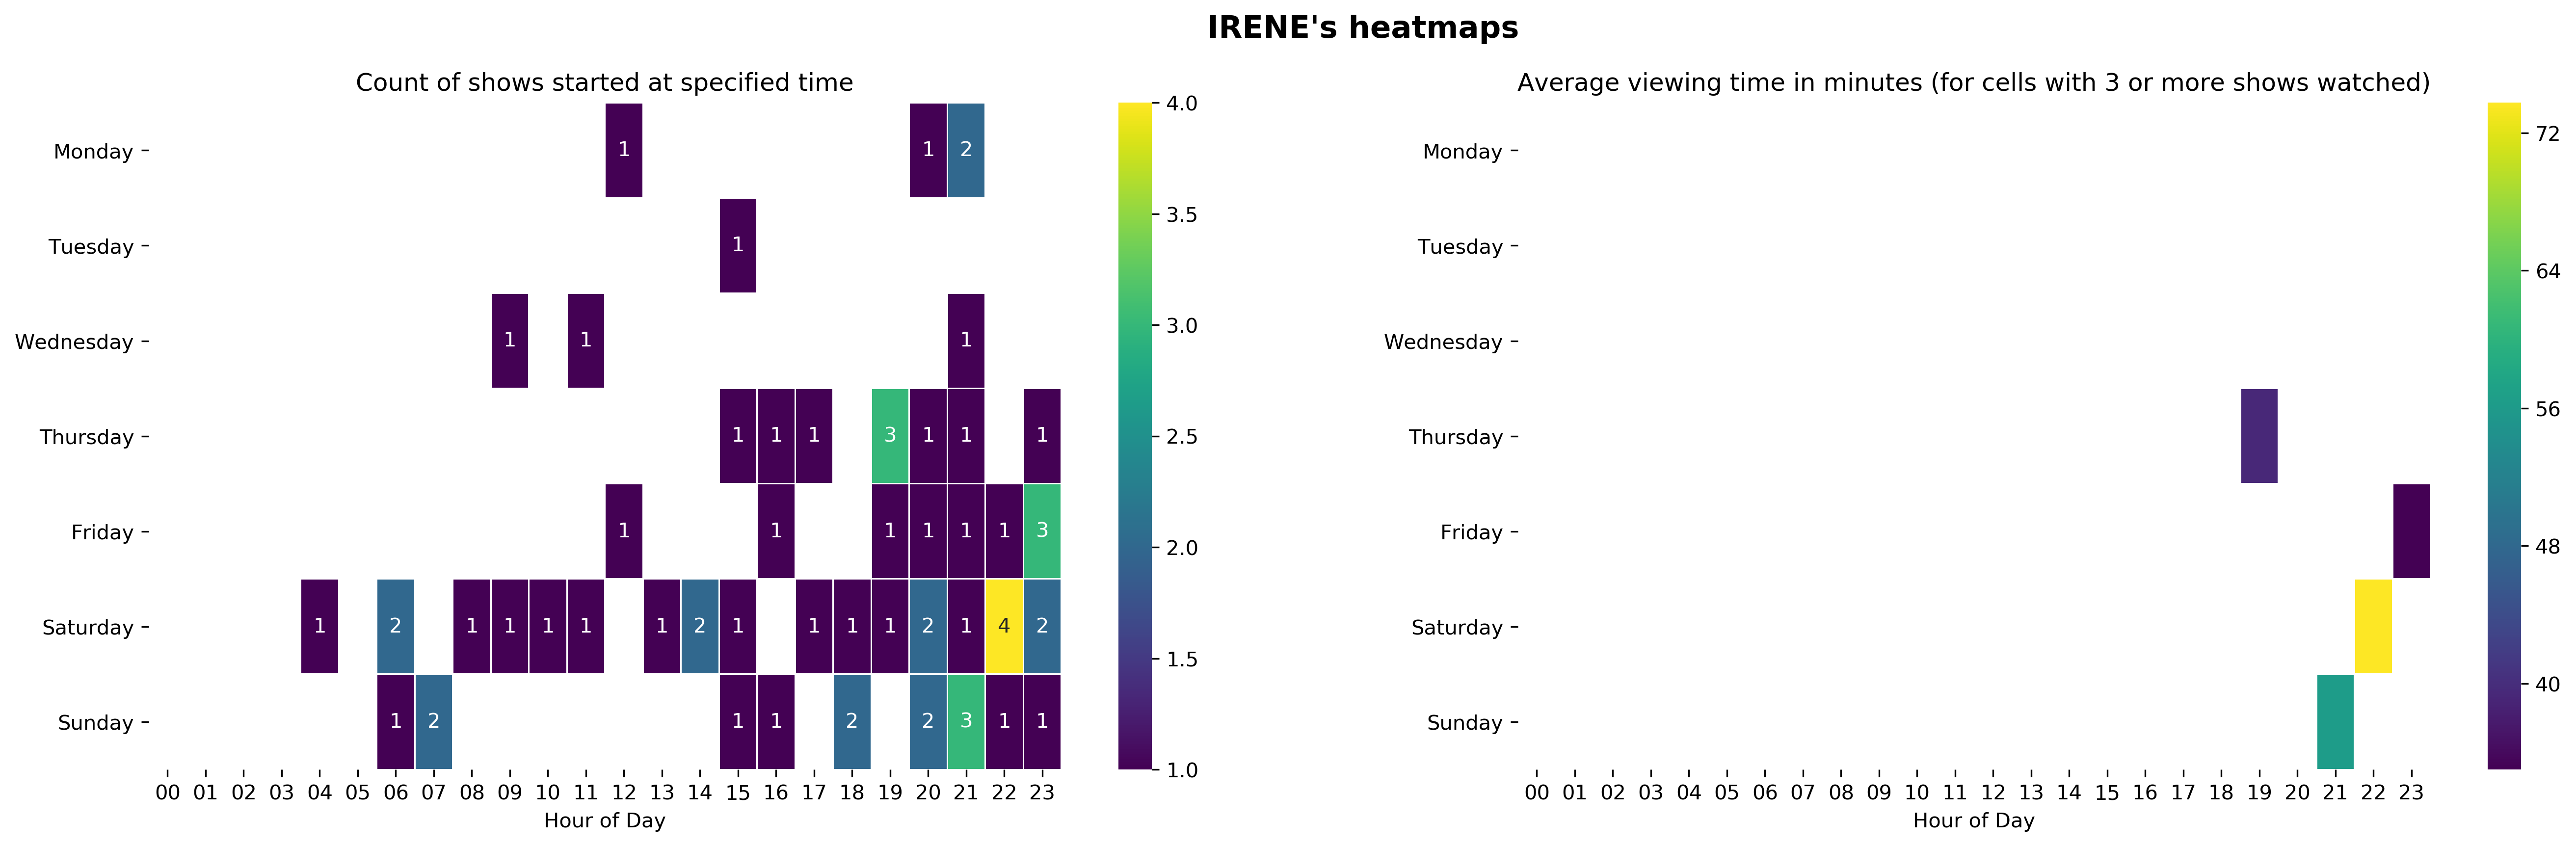

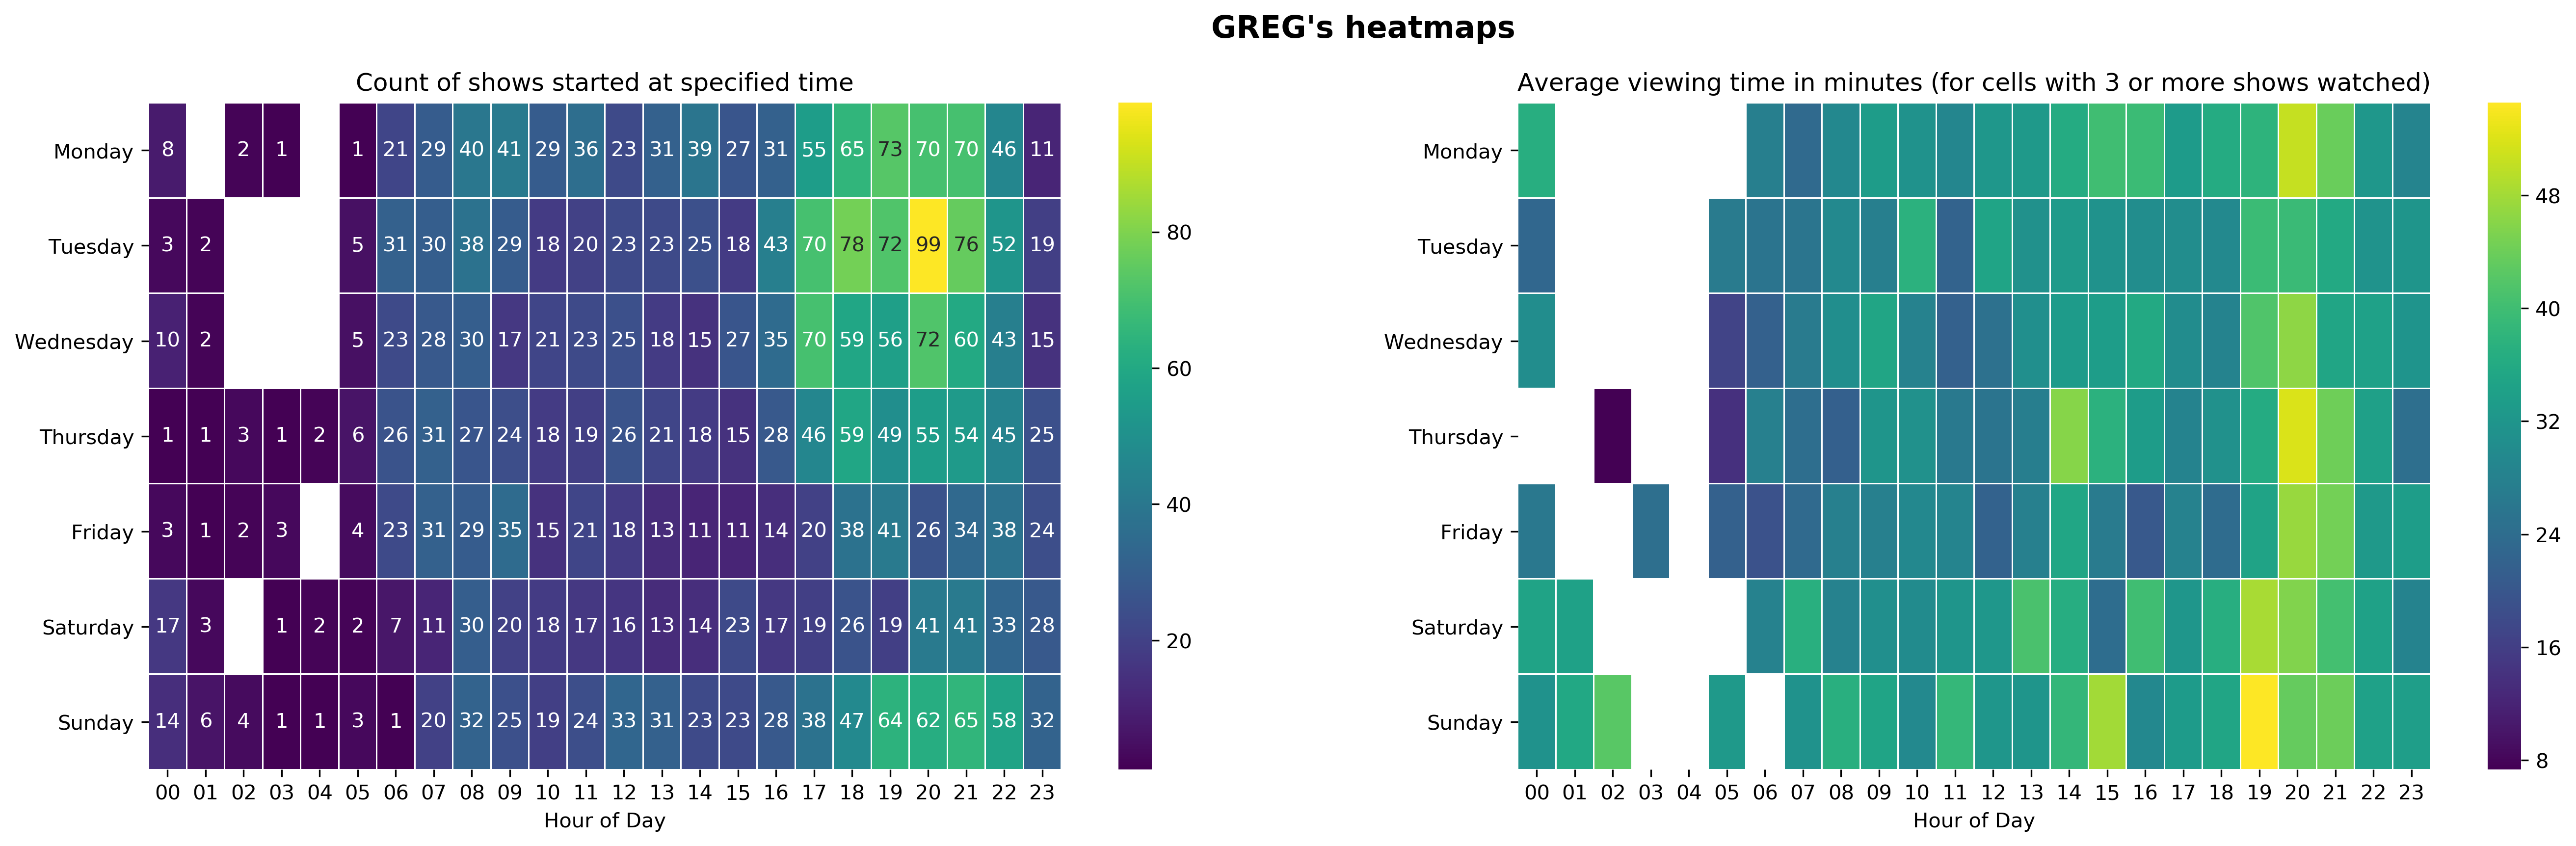

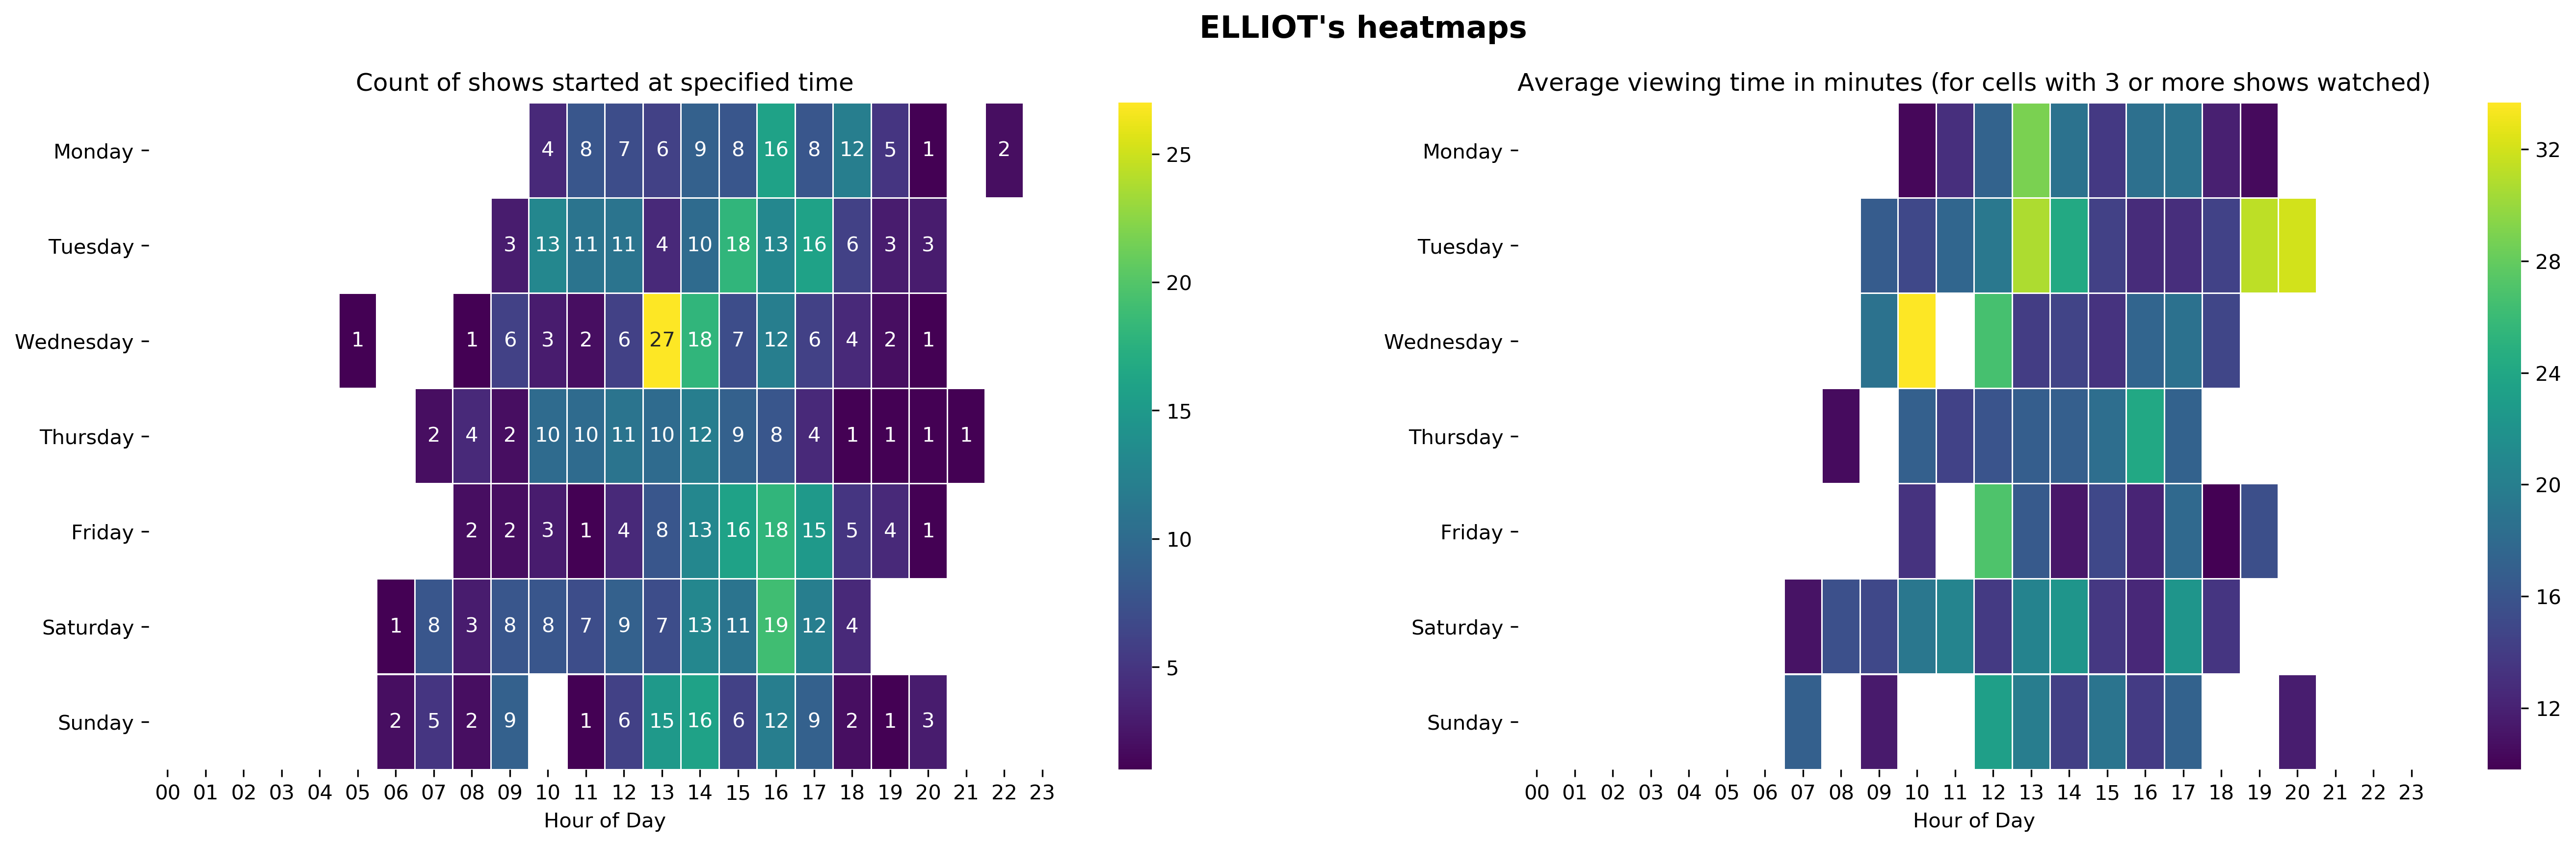

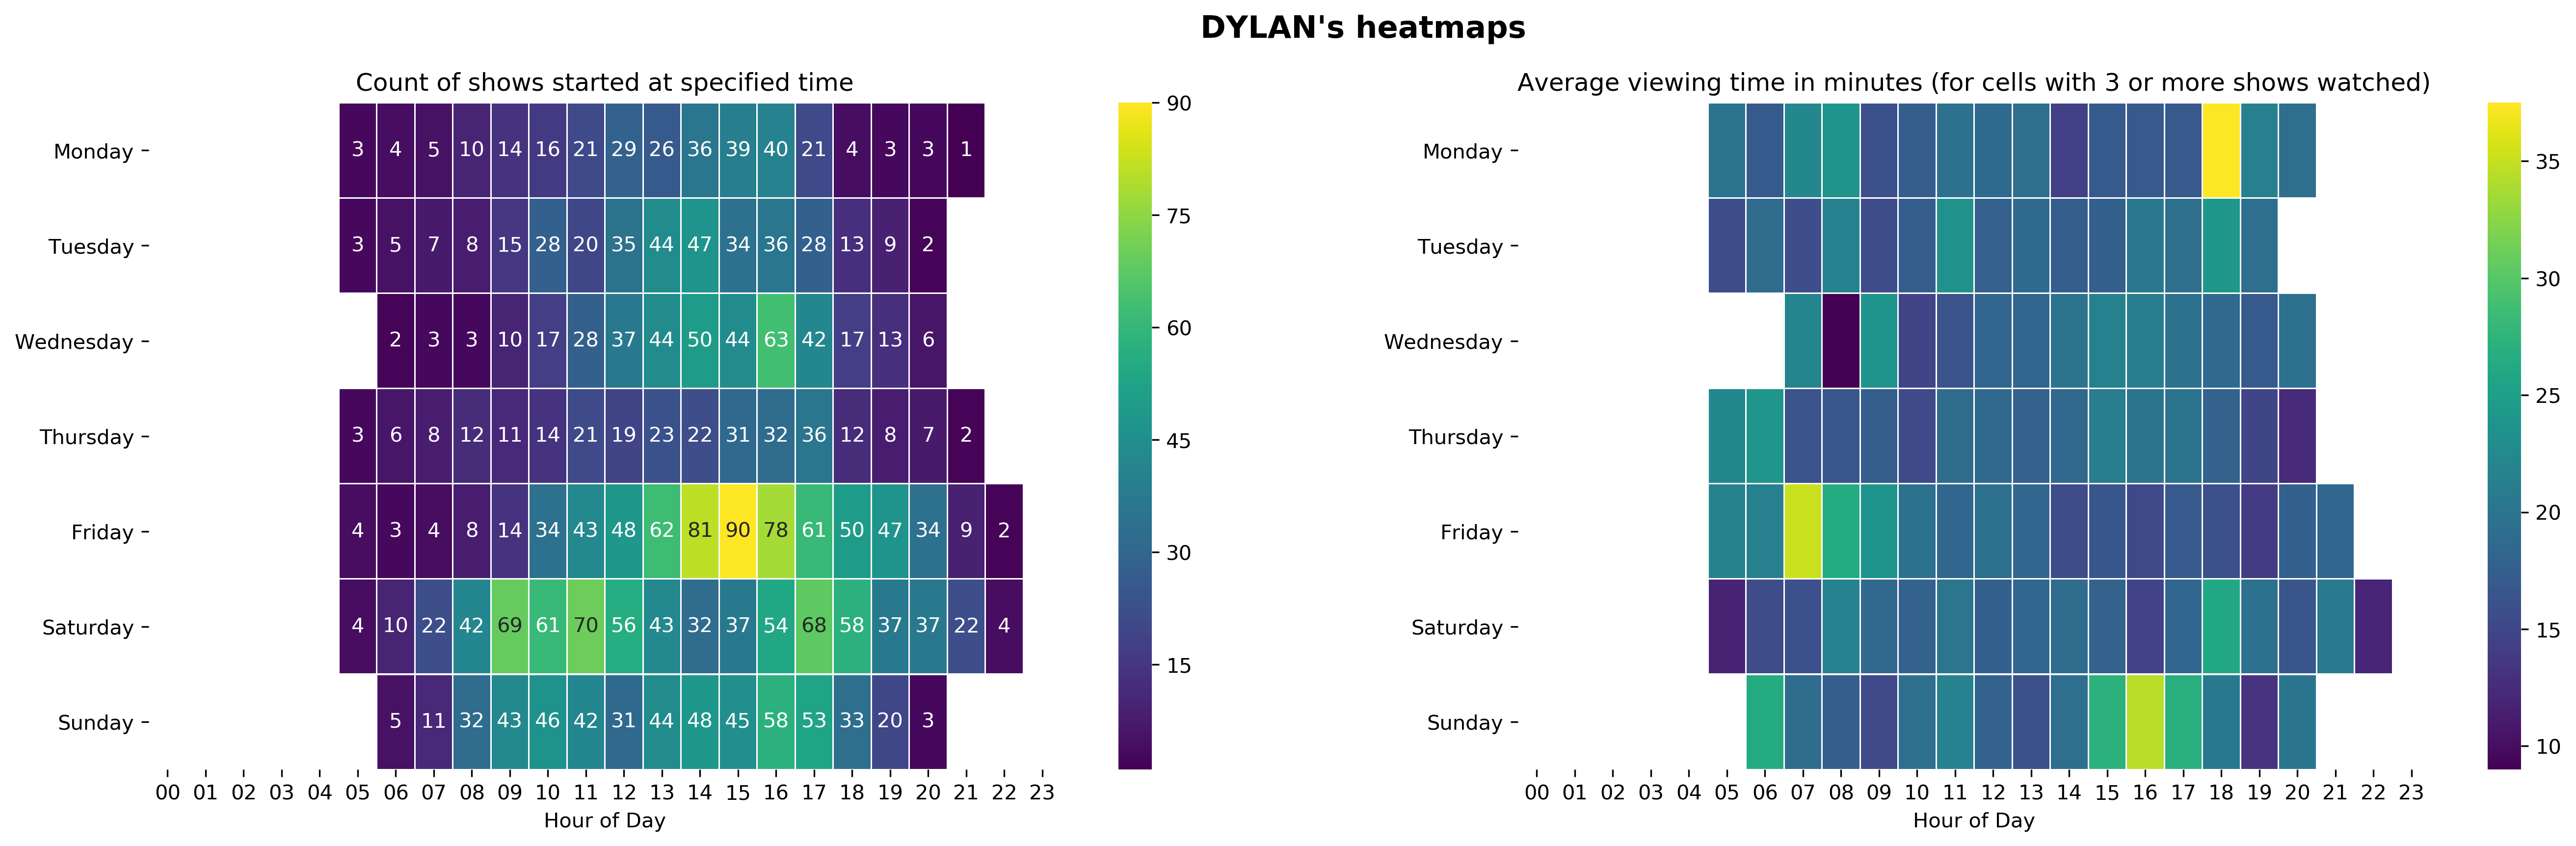

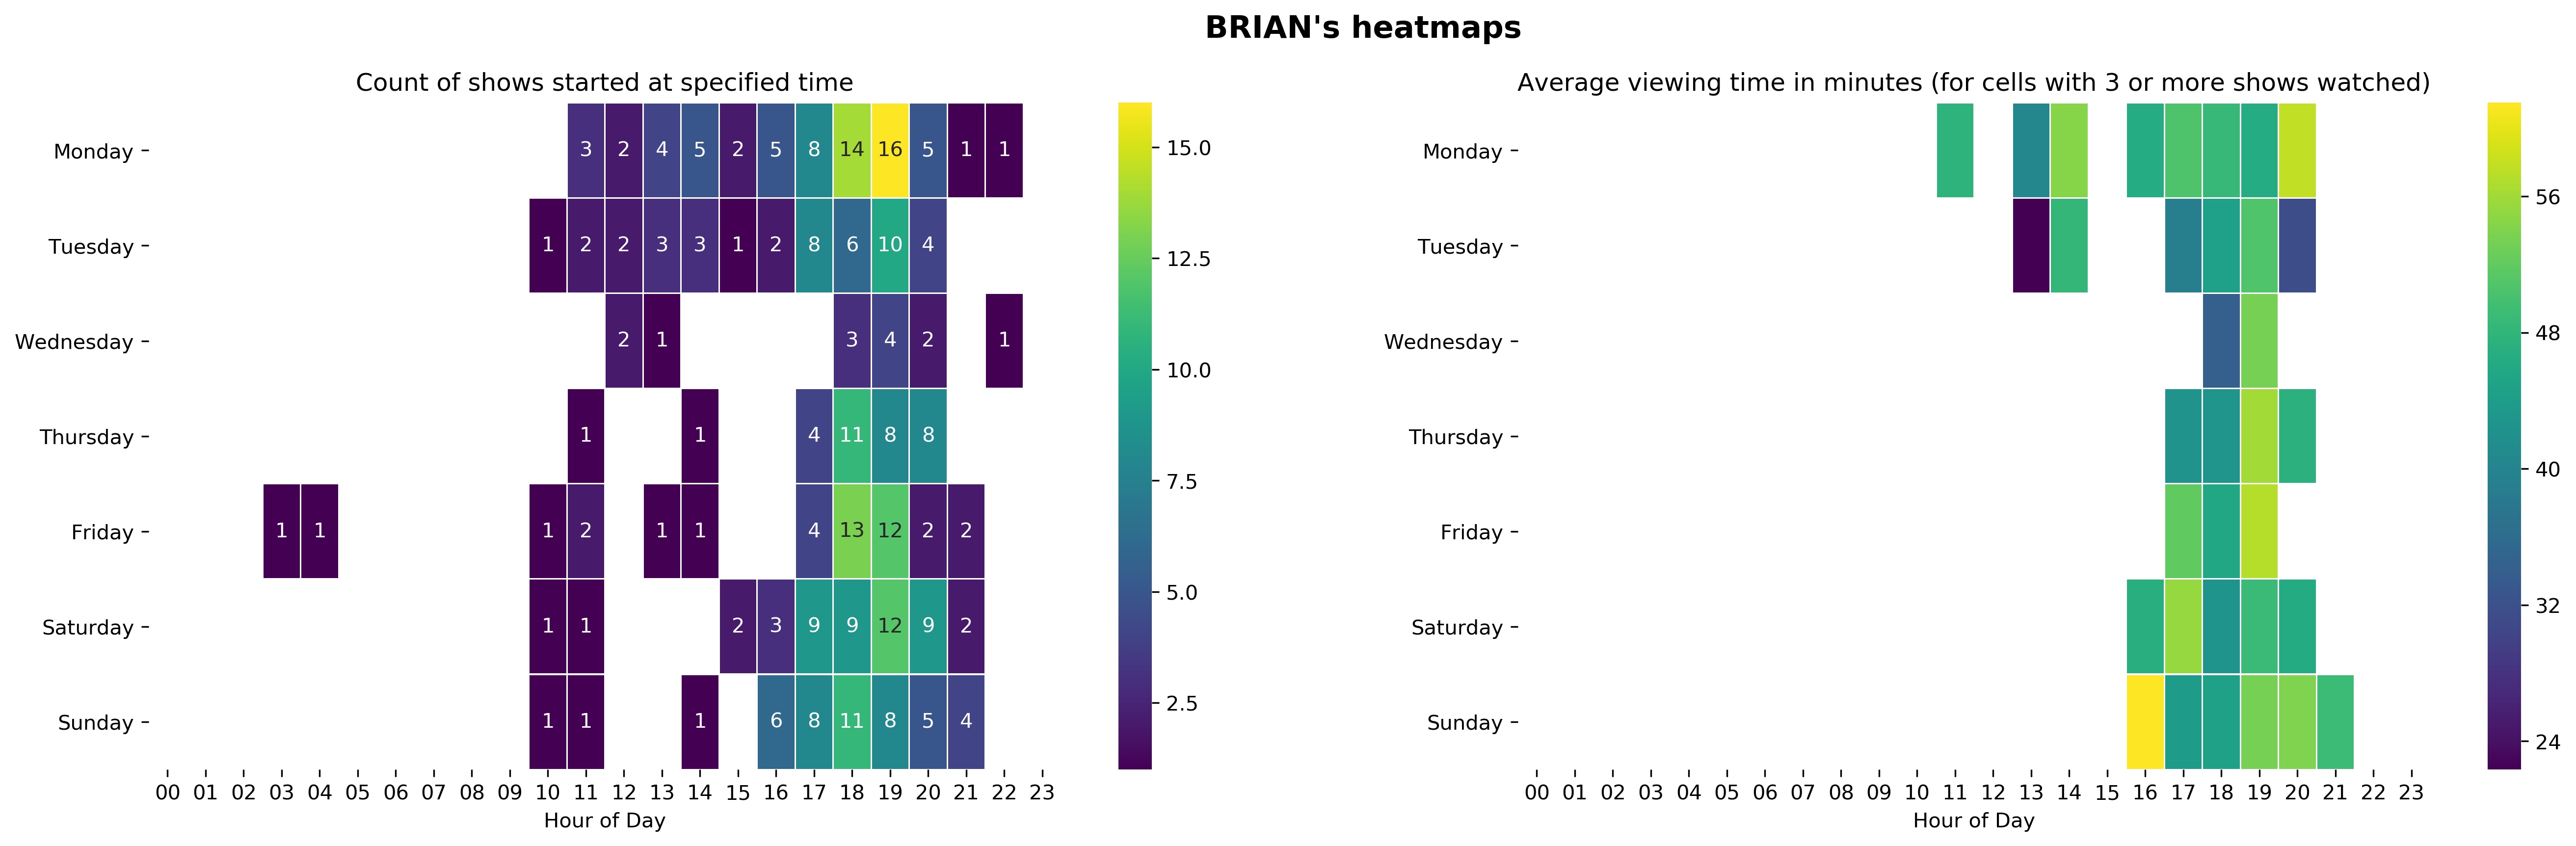

In [162]:
#Loop per name in list and create two heatmaps. Total count of shows watched and average viewing time
for name in df_netflix['Profile Name'].unique():
    
    #Create 2 plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(22,6), dpi=300)
       
    #Filter data per name
    df_filtered = df_netflix.loc[df_netflix['Profile Name'].str.contains(name)]
    #Calculate MEAN and COUNT by weekday and hour of day
    df_day_time = df_filtered.groupby(['Weekday','Hour of Day'])['Duration in Minutes'].agg(['mean', 'count']).reset_index().sort_values(by = ['Weekday','Hour of Day'], ascending = False)
    #Turn both MEAN and COUNT into pivot tables. Reindex with categorys created earlier preserves heatmap axis if no data present
    df_day_time_mean_piv = df_day_time.loc[df_day_time['count'] >=3].pivot("Weekday", "Hour of Day", "mean")
    df_day_time_mean_piv = df_day_time_mean_piv.reindex(cats_hour, axis = 1)
    df_day_time_mean_piv = df_day_time_mean_piv.reindex(cats_days, axis = 0)
    df_day_time_count_piv = df_day_time.pivot("Weekday", "Hour of Day", "count")
    df_day_time_count_piv = df_day_time_count_piv.reindex(cats_hour, axis = 1)
    df_day_time_count_piv = df_day_time_count_piv.reindex(cats_days, axis = 0)
    
    #Create COUNT heatmap and assign to left plot (axes 0)
    sns.heatmap(df_day_time_count_piv, cmap="viridis", linewidths=.5, annot = True, ax = axes[0])
    axes[0].title.set_text('Count of shows started at specified time')
    axes[0].set_ylabel('')
    
    #Create AVERAGE viewing time heatmap and assign to right plot (axes 1)
    sns.heatmap(df_day_time_mean_piv, cmap="viridis", linewidths=.5, ax = axes[1])
    axes[1].title.set_text('Average viewing time in minutes (for cells with 3 or more shows watched)')
    axes[1].set_ylabel('')

    #Add a single title above the two plots
    fig.suptitle(name.upper()+"'s heatmaps", fontsize = 15, weight = 800)
    plt.show()
    
    #Uncomment this print to see titles watched in individual cells. Just change Hour and Weekday to required values
    #print(df_netflix.loc[(df_netflix['Profile Name'].str.contains(name)) & (df_netflix['Hour of Day'] == "06") & (df_netflix['Weekday'] == "Tuesday")])

Lets see who uses which device. The following table shows the % useage of each device per profile (each column adds up to 100%) 

In [163]:
pd.crosstab(df_netflix['Device Type Group'], df_netflix['Profile Name'], margins = True, margins_name="Total", normalize="columns").mul(100).round(1).astype(str) + '%'

Profile Name       Brian  Dylan Elliot   Greg  Irene   Jenny  Maria Maria and Rick   Rick  Rosie Rosie and Greg  Stella  \
Device Type Group                                                                                                         
Computer            0.0%   1.5%   0.4%  10.4%   0.0%    0.0%  11.3%           1.2%   0.0%   1.6%           2.5%    0.0%   
Phone               2.1%   2.3%   5.5%  18.4%   0.0%    0.0%   7.9%           1.5%  26.3%  18.3%           0.0%    0.0%   
TV                 95.8%  90.3%  72.7%  59.2%  81.0%  100.0%  78.5%          96.4%  73.7%  78.6%          96.1%  100.0%   
Tablet              2.1%   5.9%  21.3%  12.0%  19.0%    0.0%   2.3%           0.9%   0.0%   1.5%           1.4%    0.0%   

Profile Name      Steven  Total  
Device Type Group                
Computer           80.9%   4.3%  
Phone               0.0%   9.8%  
TV                 19.1%  79.7%  
Tablet              0.0%   6.2%

Greg is a bit of an all-rounder whereas Steve likes his computer.

We've seen who watched the titles with the longest duration, but lets find who binge watches things all in one go! This shows who watched the most in one day (up to 5am the following morning)

In [164]:
#Anything upto 5am the following morning counts as the previous day for the purpose of binge watching
def binge(row):
    if row['Hour of Day'] == "00" or row['Hour of Day'] == "01" or row['Hour of Day'] == "02" or row['Hour of Day'] == "03" or row['Hour of Day'] == "04":
        return row['Start Time'] + pd.offsets.Day(-1) 
    else:
        return row['Start Time']

#Apply bing function and use Binge Day to measure duration
df_netflix['Binge Day'] = df_netflix.apply(binge, axis = 'columns')
df_netflix['Binge Day'] = df_netflix['Binge Day'].dt.strftime("%d/%m/%Y")

#Sum duration by binge day
df_binge = df_netflix.groupby(['Profile Name', 'Binge Day'])['Duration in Minutes'].agg(['count', 'sum', 'mean']).sort_values(by = 'sum', ascending = False).reset_index()

#Top binge day per profile. Format and rename then print
binge_top10 = df_binge.groupby('Profile Name').apply(lambda df: df.iloc[0,:]).sort_values(by = 'sum', ascending = False).reset_index(drop = True)
binge_top10['mean'] = binge_top10['mean'].round(2)
binge_top10.rename(columns = {'count': 'Num shows watched', 'sum': 'Total minutes', 'mean': 'Avg minutes per show'}, inplace = True)
print("These are the top binge days per profile:\n\n",binge_top10)

#Highlight and print the top binger!
binge_max = df_binge.loc[df_binge['sum'].idxmax(),['Profile Name', 'Binge Day', 'sum']]
display(md("Our king binger is **{}**!  **{}** hours of Netflix were watched on **{}**.".format(binge_max[0], (binge_max[2]/60).round(2), binge_max[1])))

#Print binge day per profile
for index, row in binge_top10.iterrows():
    print("\nBinge day viewing for", row['Profile Name'], "on", row['Binge Day'],":")
    display(df_netflix.loc[(df_netflix['Profile Name'] == row['Profile Name']) & (df_netflix['Binge Day'] == row['Binge Day']),['Profile Name', 'Title', 'Start Time', 'Duration in Minutes']].sort_values(by = 'Start Time').style.hide_index())



These are the top binge days per profile:

       Profile Name   Binge Day  Num shows watched  Total minutes  Avg minutes per show
0             Greg  03/01/2017                 24           1018                 42.42
1           Stella  26/03/2020                 21            806                 38.38
2            Rosie  25/06/2018                 31            638                 20.58
3            Maria  28/03/2017                 14            583                 41.64
4            Dylan  02/08/2017                 22            526                 23.91
5             Rick  20/10/2018                 11            483                 43.91
6            Irene  28/09/2019                  5            439                 87.80
7            Brian  15/02/2021                 12            433                 36.08
8   Maria and Rick  30/08/2020                 10            404                 40.40
9   Rosie and Greg  01/01/2018                  7            396                 56.57

Our king binger is **Greg**!  **16.97** hours of Netflix were watched on **03/01/2017**.


Binge day viewing for Greg on 03/01/2017 :



Binge day viewing for Stella on 26/03/2020 :



Binge day viewing for Rosie on 25/06/2018 :



Binge day viewing for Maria on 28/03/2017 :



Binge day viewing for Dylan on 02/08/2017 :



Binge day viewing for Rick on 20/10/2018 :



Binge day viewing for Irene on 28/09/2019 :



Binge day viewing for Brian on 15/02/2021 :



Binge day viewing for Maria and Rick on 30/08/2020 :



Binge day viewing for Rosie and Greg on 01/01/2018 :



Binge day viewing for Elliot on 16/12/2019 :



Binge day viewing for Jenny on 03/09/2020 :



Binge day viewing for Steven on 11/12/2020 :


What are the top 20 most watched titles (based on duration) and who has watched them?

In [165]:
most_watched_ordered = df_netflix.groupby(['Profile Name', 'Title'])['Duration in Minutes'].agg('sum').reset_index()

#most_watched = most_watched_ordered.pivot("Title", "Profile Name", "Duration in Minutes")
most_watched = most_watched_ordered.pivot_table(index=['Title'], values=['Duration in Minutes'], columns=['Profile Name'], aggfunc='sum', margins = True, margins_name = 'Total')
most_watched = most_watched.reindex(most_watched['Duration in Minutes'].sort_values(by='Total', ascending=False).index).fillna(0).drop('Total')
most_watched.head(20)

Duration in Minutes                                           \
Profile Name                                                     Brian  Dylan Elliot   Greg  Irene  Jenny Maria   
Title                                                                                                             
Avengers Assemble                                                  0.0    0.0    0.0  380.0    0.0    0.0   0.0   
Jack Reacher                                                       0.0    0.0    0.0  253.0    0.0    0.0   0.0   
Mission: Impossible - Ghost Protocol                               0.0    0.0    0.0  251.0    0.0    0.0   0.0   
Inception                                                        140.0    0.0    0.0  140.0    0.0    0.0   0.0   
The Exorcism of Emily Rose                                         0.0    0.0    0.0  210.0    0.0    0.0   0.0   
Deadpool                                                           0.0    0.0    0.0    0.0    0.0    0.0   0.0   
Pokémon - Η Ταινία: Διαλέγω Εσένα!                                 0.0  382.0    0.0    0.0    0.0    0.0   0.0   
World War Z                                                        0.0    0.0    0.0  325.0    0.0    0.0   0.0   
La La Land                                                         0.0    0.0    0.0    0.0  120.0    0.0   0.0   
Terminator Genisys                                                 0.0    0.0    0.0  117.0    0.0    0.0   0.0   
Iron Man 3                                                         0.0    0.0    0.0  248.0    0.0    0.0   0.0   
Angry Birds: Η Ταινία                                              0.0  360.0    0.0    0.0    0.0    0.0   0.0   
Kung Fu Panda                                                      0.0  346.0    9.0    0.0    0.0    0.0   0.0   
Orange Is the New Black: Season 2: We Have Mann...                 0.0    0.0    0.0  180.0    0.0    0.0   0.0   
The Old Guard                                                    115.0    0.0    0.0    0.0    0.0  114.0   0.0   
The Martian                                                        0.0    0.0    0.0  203.0    0.0    0.0   0.0   
Orange Is the New Black: Season 3: Finger in th...                 0.0    0.0    0.0  226.0    0.0    0.0   0.0   
Line of Duty: Season 3: Episode 6                                 84.0    0.0    0.0    0.0    0.0    0.0   0.0   
Jack Reacher: Never Go Back                                        0.0    0.0    0.0    0.0    0.0    0.0   0.0   
The Wolf of Wall Street                                            0.0    0.0    0.0  172.0    0.0    0.0   0.0   

                                                                                                                  
Profile Name                                       Maria and Rick Rick  Rosie Rosie and Greg Stella Steven Total  
Title                                                                                                             
Avengers Assemble                                             0.0  0.0  135.0            0.0    0.0    0.0   515  
Jack Reacher                                                  0.0  0.0  126.0            0.0    0.0  130.0   509  
Mission: Impossible - Ghost Protocol                          0.0  0.0    0.0          252.0    0.0    0.0   503  
Inception                                                   141.0  0.0   39.0            0.0    0.0    0.0   460  
The Exorcism of Emily Rose                                    0.0  0.0  225.0            0.0    0.0    0.0   435  
Deadpool                                                    104.0  0.0  105.0          203.0    0.0    0.0   412  
Pokémon - Η Ταινία: Διαλέγω Εσένα!                            0.0  0.0    0.0            0.0    0.0    0.0   382  
World War Z                                                   0.0  0.0   54.0            0.0    0.0    0.0   379  
La La Land                                                  247.0  0.0    0.0            0.0    0.0    0.0   367  
Terminator Genisys       

And finally, lets see what films are people watching around christmas time.  
(Lets assume anything which had a duration over 75 minutes is a film)

In [166]:
#We're going to look at every christmas from the earliest date in the data until the current year
#Create list of years between this time frame
lst_avail_dates = [x for x in range(df_netflix['Start Time'].describe()[4].year,datetime.datetime.now().year)]

display(md("### <U>Films watched at <font color='red'>Christmas</font> and New Year</U>"))
display(md("Checking for films watched between 22nd December and 2nd January<br><br>"))

#Function to return data between two dates with a duration >= 'dur'
def select_time_period(from_date, to_date, dur):
    df_time = df_netflix.loc[(df_netflix['Duration in Minutes'] >= dur) &
                             (df_netflix['Start Time'].between(from_date, to_date)),
                             ['Start Time', 'Title', 'Profile Name', 'Duration']].sort_values(by = 'Start Time', ascending = True)
    display(md("**{}**".format(from_date[0:4])))
    if df_time.empty:
        print("No movies watched by anyone this year\n")
    else:
        #Get rid of index for print
        blankIndex=[''] * len(df_time)
        df_time.index=blankIndex
        print(df_time)

#Loop all years in list and call function
for year in lst_avail_dates:
    select_time_period(str(year)+'-12-22', str(year+1)+'-01-02', 75)

### <U>Films watched at <font color='red'>Christmas</font> and New Year</U>

Checking for films watched between 22nd December and 2nd January<br><br>

**2013**

No movies watched by anyone this year



**2014**

          Start Time              Title Profile Name  Duration
 2014-12-23 14:44:01           Scrooged         Greg  01:26:38
 2014-12-24 12:33:42            Stripes         Greg  01:43:22
 2014-12-26 13:41:27          Kickboxer         Greg  01:33:56
 2015-01-01 12:42:14          Grown Ups         Greg  01:19:18
 2015-01-01 14:05:28  Girl, Interrupted         Greg  02:05:13


**2015**

No movies watched by anyone this year



**2016**

No movies watched by anyone this year



**2017**

          Start Time                   Title    Profile Name  Duration
 2017-12-24 14:32:34                     Elf  Maria and Rick  01:33:13
 2017-12-24 19:29:15           Love Actually  Rosie and Greg  02:13:48
 2017-12-25 17:57:48   It's a Wonderful Life  Maria and Rick  02:10:05
 2017-12-27 19:49:45                  Bright  Rosie and Greg  01:51:16
 2017-12-28 20:06:03           The Awakening           Rosie  01:15:22
 2017-12-30 14:23:01              Mamma Mia!  Maria and Rick  01:42:59
 2017-12-30 19:56:57           The Foreigner            Greg  01:47:16
 2018-01-01 20:00:06  Not Another Teen Movie  Rosie and Greg  01:22:55
 2018-01-01 23:39:43          Fun Mom Dinner           Rosie  01:18:24


**2018**

          Start Time                                              Title    Profile Name  Duration
 2018-12-22 16:15:05                                        The Holiday            Greg  02:10:48
 2018-12-23 19:44:57  The Lord of the Rings: The Fellowship of the Ring  Rosie and Greg  02:50:29
 2018-12-24 20:09:34              The Lord of the Rings: The Two Towers  Rosie and Greg  02:51:47
 2018-12-25 16:08:53                       Τα Χρονικά των Χριστουγέννων           Dylan  01:39:31
 2018-12-26 16:41:02             Arthur Christmas: Ο Γιος του Αϊ Βασίλη           Dylan  01:31:41
 2018-12-29 21:38:32                         Black Mirror: Bandersnatch  Rosie and Greg  01:29:25


**2019**

          Start Time                    Title    Profile Name  Duration
 2019-12-23 06:57:02                    CHIPS            Greg  01:38:12
 2019-12-26 19:09:41                The Thing  Rosie and Greg  01:35:05
 2019-12-27 00:22:33  Fighting with My Family           Rosie  01:43:49
 2019-12-28 13:39:18           Dracula Untold           Rosie  01:25:33
 2019-12-28 15:12:59          Office Uprising           Rosie  01:24:32
 2019-12-28 16:43:02            Angel of Mine           Rosie  01:31:29


**2020**

          Start Time              Title    Profile Name  Duration
 2020-12-26 18:50:56          Ο Γκριντς           Dylan  01:21:52
 2020-12-27 15:34:33     The Karate Kid            Greg  01:33:10
 2020-12-29 19:49:58     A Star Is Born           Brian  02:10:20
 2021-01-01 08:42:10          100% Wolf           Dylan  01:34:06
 2021-01-01 17:01:16  The Polar Express  Maria and Rick  01:31:58
